# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

In [2]:
cd E:/

E:\


<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:
#separating byte files and asm files 

source = 'train'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        #print(file)
        if (file.endswith("bytes")):
            
            shutil.move(source+'/'+file,destination)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


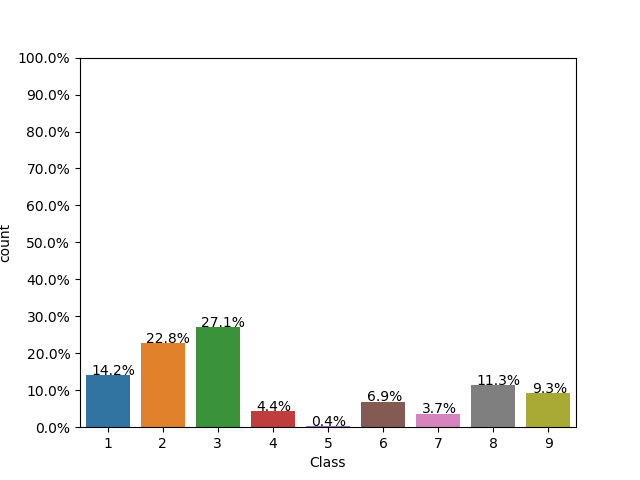

In [3]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

* Class label are highly imbalanced i.e imbalance data.

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [4]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

   Class                    ID      size
0      9  01azqd4InC7m9JpocGv5  4.234863
1      2  01IsoiSMh5gxyDYTl4CB  5.538818
2      9  01jsnpXSAlgw6aPeDxrU  3.887939
3      1  01kcPWA9K2BOxQeS5Rju  0.574219
4      8  01SuzwMJEIXsK7A8dQbl  0.370850


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


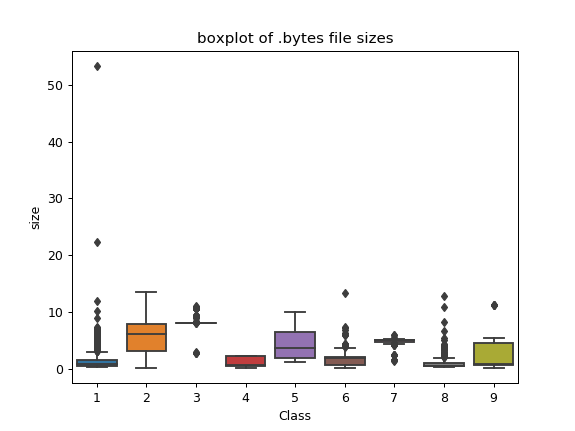

In [33]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+'.bytes',"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+'.bytes')
        text_file.close()



In [ ]:
files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),256),dtype=int)
k=0


#program to convert into bi-grams and n-grams bag of words of bytefiles
#this is custom-built bag of words this is bi-grams and n-grams bag of words
byte_feature_file=open('result_2.csv','w+')
#byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
#bigrams and n-grams features
byte_feature_file.write("ID,0 1,1 2,2 3,3 4,4 5,5 6,6 7,7 8,8 9,9 0a,0a 0b,0b 0c,0c 0d,0d 0e,0e 0f,0f 10,10 11,11 12,12 13,13 14,14 15,15 16,16 17,17 18,18 19,19 1a,1a 1b,1b 1c,1c 1d,1d 1e,1e 1f,1f 20,20 21,21 22,22 23,23 24,24 25,25 26,26 27,27 28,28 29,29 2a,2a 2b,2b 2c,2c 2d,2d 2e,2e 2f,2f 30,30 31,31 32,32 33,33 34,34 35,35 36,36 37,37 38,38 39,39 3a,3a 3b,3b 3c,3c 3d,3d 3e,3e 3f,3f 40,40 41,41 42,42 43,43 44,44 45,45 46,46 47,47 48,48 49,49 4a,4a 4b,4b 4c,4c 4d,4d 4e,4e 4f,4f 50,50 51,51 52,52 53,53 54,54 55,55 56,56 57,57 58,58 59,59 5a,5a 5b,5b 5c,5c 5d,5d 5e,5e 5f,5f 60,60 61,61 62,62 63,63 64,64 65,65 66,66 67,67 68,68 69,69 6a,6a 6b,6b 6c,6c 6d,6d 6e,6e 6f,6f 70,70 71,71 72,72 73,73 74,74 75,75 76,76 77,77 78,78 79,79 7a,7a 7b,7b 7c,7c 7d,7d 7e,7e 7f,7f 80,80 81,81 82,82 83,83 84,84 85,85 86,86 87,87 88,88 89,89 8a,8a 8b,8b 8c,8c 8d,8d 8e,8e 8f,8f 90,90 91,91 92,92 93,93 94,94 95,95 96,96 97,97 98,98 99,99 9a,9a 9b,9b 9c,9c 9d,9d 9e,9e 9f,9f a0,a0 a1,a1 a2,a2 a3,a3 a4,a4 a5,a5 a6,a6 a7,a7 a8,a8 a9,a9 aa,aa ab,ab ac,ac ad,ad ae,ae af,af b0,b0 b1,b1 b2,b2 b3,b3 b4,b4 b5,b5 b6,b6 b7,b7 b8,b8 b9,b9 ba,ba bb,bb bc,bc bd,bd be,be bf,bf c0,c0 c1,c1 c2,c2 c3,c3 c4,c4 c5,c5 c6,c6 c7,c7 c8,c8 c9,c9 ca,ca cb,cb cc,cc cd,cd ce,ce cf,cf d0,d0 d1,d1 d2,d2 d3,d3 d4,d4 d5,d5 d6,d6 d7,d7 d8,d8 d9,d9 da,da db,db dc,dc dd,dd de,de df,df e0,e0 e1,e1 e2,e2 e3,e3 e4,e4 e5,e5 e6,e6 e7,e7 e8,e8 e9,e9 ea,ea eb,eb ec,ec ed,ed ee,ee ef,ef f0,f0 f1,f1 f2,f2 f3,f3 f4,f4 f5,f5 f6,f6 f7,f7 f8,f8 f9,f9 fa,fa fb,fb fc,fc fd,fd fe,fe ff,ff ??")
for file in files:
    filenames2.append(file)
    #file.split('.')[0]
    byte_feature_file.write(file.split('.')[0]+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='ff ??'or hex_code=='??':
                        feature_matrix[k][255]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [5]:
byte_features=pd.read_csv("result_2.csv")
print (byte_features.head())

                 Unnamed: 0                    ID     0 1   1 2   2 3   3 4  \
0  01azqd4InC7m9JpocGv5.txt  01azqd4InC7m9JpocGv5  601905  3905  2816  3832   
1  01IsoiSMh5gxyDYTl4CB.txt  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186   
2  01jsnpXSAlgw6aPeDxrU.txt  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438   
3  01kcPWA9K2BOxQeS5Rju.txt  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817   
4  01SuzwMJEIXsK7A8dQbl.txt  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   

    4 5   5 6   6 7   7 8  \
0  3345  3242  3650  3201   
1  8663  6844  8420  7589   
2  8925  9330  9007  2342   
3  1257   625   550   523   
4   559   410   262   249   

                                                                                                                                                                                                                                                                                                                                                              

In [6]:
result = pd.merge(byte_features, data_size_byte,on='ID', how='left')
result.head()

Unnamed: 0                    ID     0 1   1 2   2 3   3 4  \
0  01azqd4InC7m9JpocGv5.txt  01azqd4InC7m9JpocGv5  601905  3905  2816  3832   
1  01IsoiSMh5gxyDYTl4CB.txt  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186   
2  01jsnpXSAlgw6aPeDxrU.txt  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438   
3  01kcPWA9K2BOxQeS5Rju.txt  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817   
4  01SuzwMJEIXsK7A8dQbl.txt  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   

    4 5   5 6   6 7   7 8    ...     f9 fa  fa fb  fb fc  fc fd  fd fe  fe ff  \
0  3345  3242  3650  3201    ...      3101   3211   3097   2758   3099   2759   
1  8663  6844  8420  7589    ...       439    281    302   7639    518  17001   
2  8925  9330  9007  2342    ...      2242   2885   2863   2471   2786   2680   
3  1257   625   550   523    ...       485    462    516   1133    471    761   
4   559   410   262   249    ...       350    209    239    653    221    242   

   ff ??  \
0   5753   
1  54902   
2  49144   
3   7998   
4   2199   

   0 1 2 3 4 5 6 7 8 9 0a 0b 0c 0d 0e 0f 10 11 12 13 14 15 16 17 18 19 1a 1b 1c 1d 1e 1f 20 21 22 23 24 25 26 27 28 29 2a 2b 2c 2d 2e 2f 30 31 32 33 34 35 36 37 38 39 3a 3b 3c 3d 3e 3f 40 41 42 43 44 45 46 47 48 49 4a 4b 4c 4d 4e 4f 50 51 52 53 54 55 56 57 58 59 5a 5b 5c 5d 5e 5f 60 61 62 63 64 65 66 67 68 69 6a 6b 6c 6d 6e 6f 70 71 72 73 74 75 76 77 78 79 7a 7b 7c 7d 7e 7f 80 81 82 83 84 85 86 87 88 89 8a 8b 8c 8d 8e 8f 90 91 92 93 94 95 96 97 98 99 9a 9b 9c 9d 9e 9f a0 a1 a2 a3 a4 a5 a6 a7 a8 a9 aa ab ac ad ae af b0 b1 b2 b3 b4 b5 b6 b7 b8 b9 ba bb bc bd be bf c0 c1 c2 c3 c4 c5 c6 c7 c8 c9 ca cb cc cd ce cf d0 d1 d2 d3 d4 d5 d6 d7 d8 d9 da db dc dd de df e0 e1 e2 e3 e4 e5 e6 e7 e8 e9 ea eb ec ed ee ef f0 f1 f2 f3 f4 f5 f6 f7 f8 f9 fa fb fc fd fe ff  \
0                                               1824                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1                                               8588                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2                                                468                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [7]:
result['Class'].value_counts()

3    2942
2    2478
1    1541
8    1228
9    1013
6     751
4     475
7     398
5      42
Name: Class, dtype: int64

In [ ]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!= str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result)

In [12]:
data_y = result['Class']
result.head()

Unnamed: 0                    ID     0 1   1 2   2 3   3 4  \
0  01azqd4InC7m9JpocGv5.txt  01azqd4InC7m9JpocGv5  601905  3905  2816  3832   
1  01IsoiSMh5gxyDYTl4CB.txt  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186   
2  01jsnpXSAlgw6aPeDxrU.txt  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438   
3  01kcPWA9K2BOxQeS5Rju.txt  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817   
4  01SuzwMJEIXsK7A8dQbl.txt  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   

    4 5   5 6   6 7   7 8    ...     f9 fa  fa fb  fb fc  fc fd  fd fe  fe ff  \
0  3345  3242  3650  3201    ...      3101   3211   3097   2758   3099   2759   
1  8663  6844  8420  7589    ...       439    281    302   7639    518  17001   
2  8925  9330  9007  2342    ...      2242   2885   2863   2471   2786   2680   
3  1257   625   550   523    ...       485    462    516   1133    471    761   
4   559   410   262   249    ...       350    209    239    653    221    242   

   ff ??  \
0   5753   
1  54902   
2  49144   
3   7998   
4   2199   

   0 1 2 3 4 5 6 7 8 9 0a 0b 0c 0d 0e 0f 10 11 12 13 14 15 16 17 18 19 1a 1b 1c 1d 1e 1f 20 21 22 23 24 25 26 27 28 29 2a 2b 2c 2d 2e 2f 30 31 32 33 34 35 36 37 38 39 3a 3b 3c 3d 3e 3f 40 41 42 43 44 45 46 47 48 49 4a 4b 4c 4d 4e 4f 50 51 52 53 54 55 56 57 58 59 5a 5b 5c 5d 5e 5f 60 61 62 63 64 65 66 67 68 69 6a 6b 6c 6d 6e 6f 70 71 72 73 74 75 76 77 78 79 7a 7b 7c 7d 7e 7f 80 81 82 83 84 85 86 87 88 89 8a 8b 8c 8d 8e 8f 90 91 92 93 94 95 96 97 98 99 9a 9b 9c 9d 9e 9f a0 a1 a2 a3 a4 a5 a6 a7 a8 a9 aa ab ac ad ae af b0 b1 b2 b3 b4 b5 b6 b7 b8 b9 ba bb bc bd be bf c0 c1 c2 c3 c4 c5 c6 c7 c8 c9 ca cb cc cd ce cf d0 d1 d2 d3 d4 d5 d6 d7 d8 d9 da db dc dd de df e0 e1 e2 e3 e4 e5 e6 e7 e8 e9 ea eb ec ed ee ef f0 f1 f2 f3 f4 f5 f6 f7 f8 f9 fa fb fc fd fe ff  \
0                                               1824                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1                                               8588                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2                                                468                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [25]:
result.drop('Unnamed: 0',inplace=True,axis=1)

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


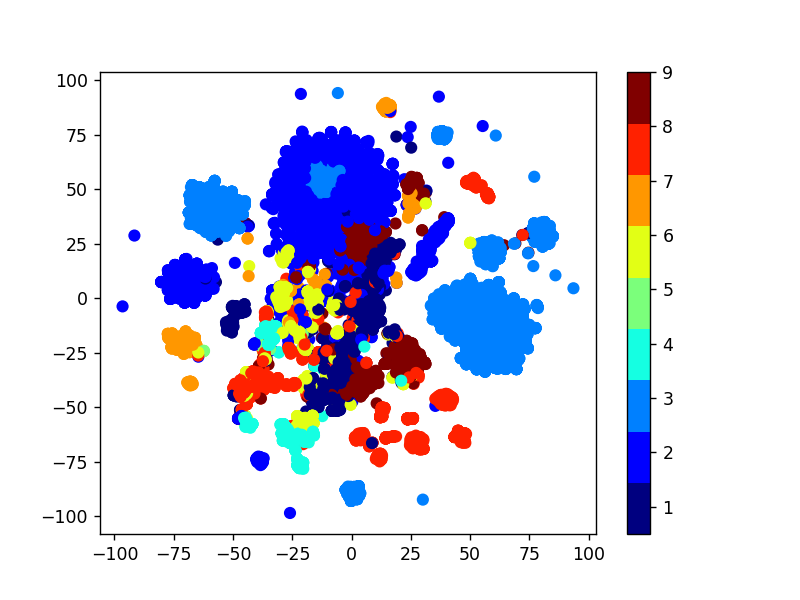

In [0]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


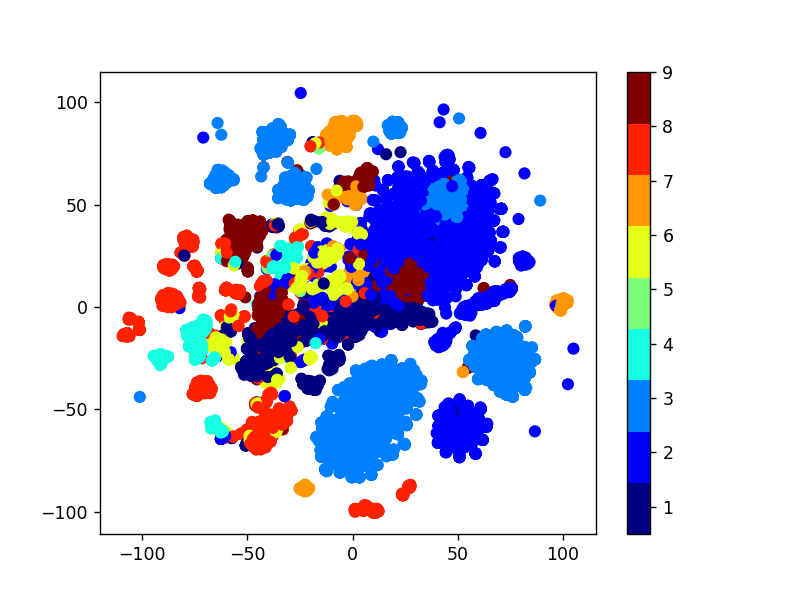

In [0]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [26]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [27]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


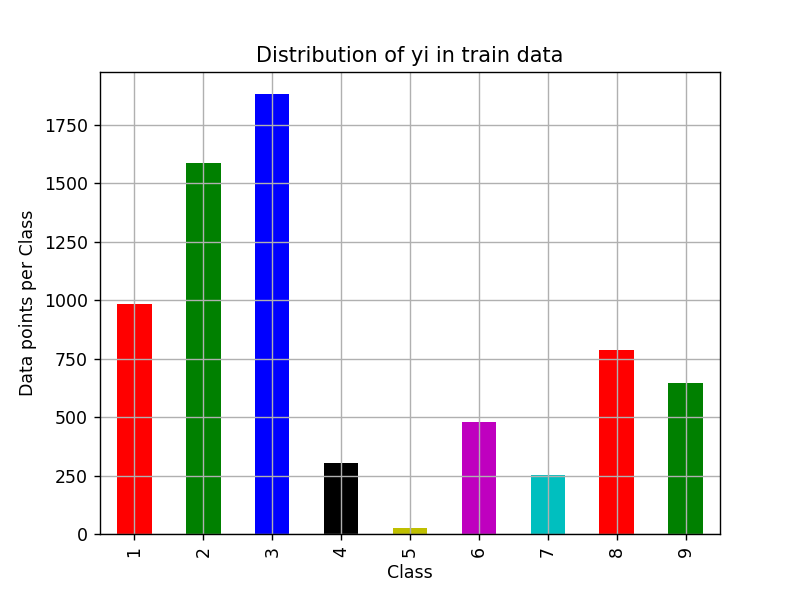

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


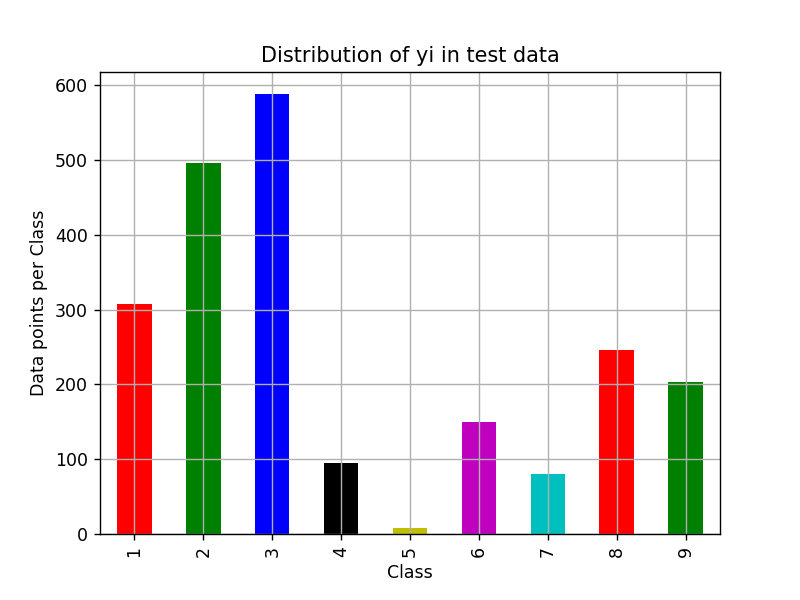

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


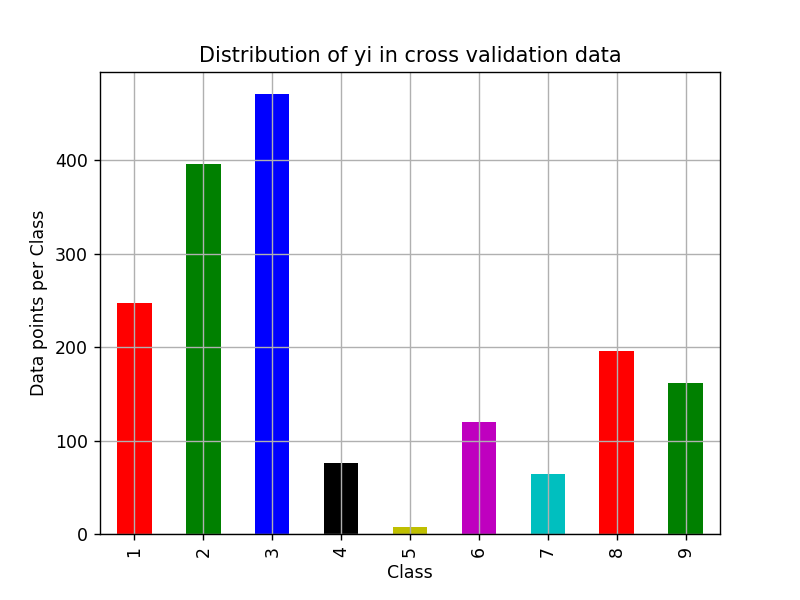

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [21]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.46891793028
Log loss on Test Data using Random Model 2.47900542522
Number of misclassified points  89.1444342226
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


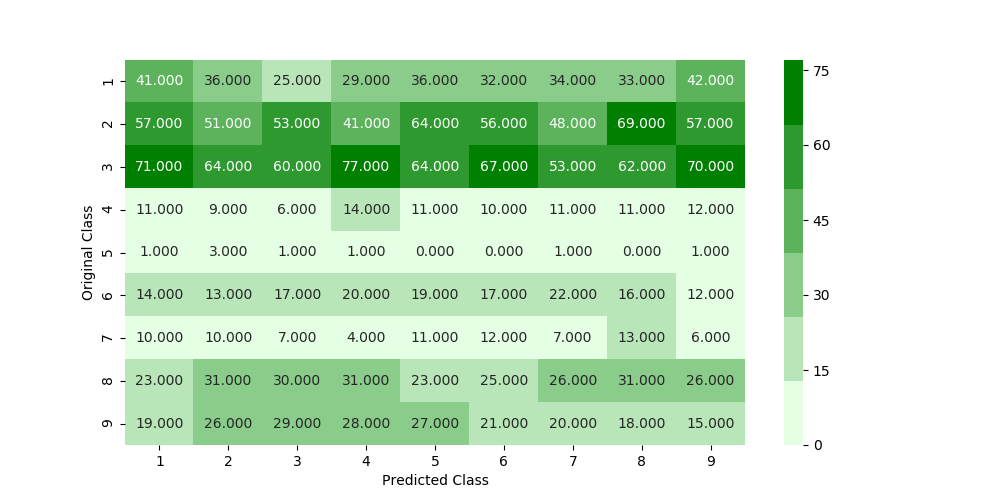

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


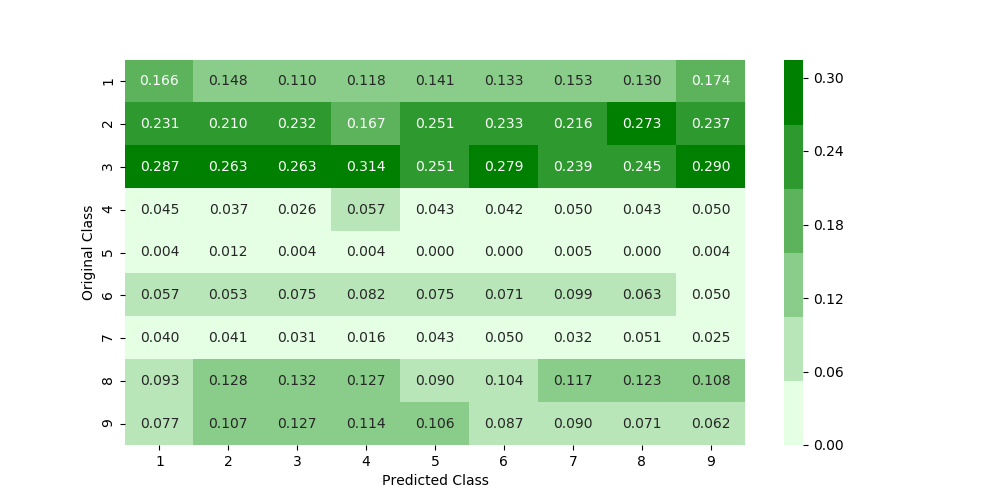

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


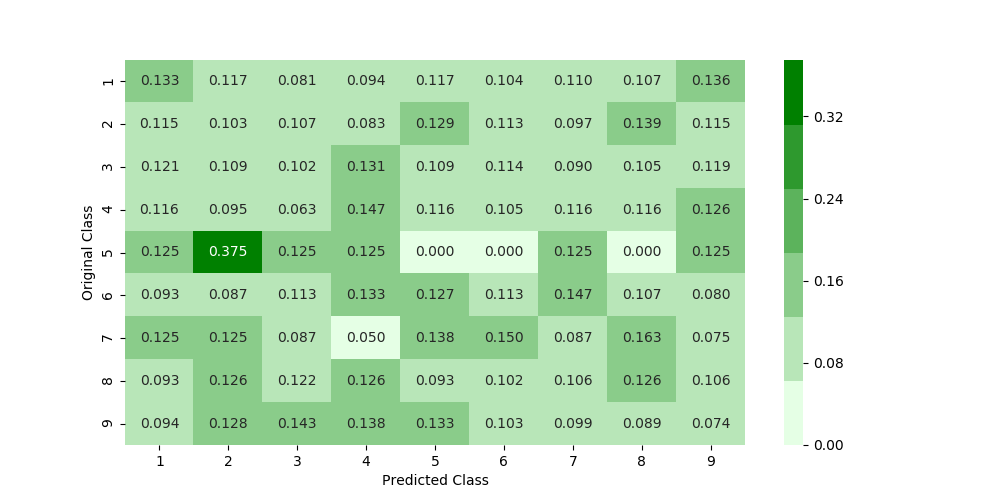

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.338397486412
log_loss for k =  3 is 0.330712690607
log_loss for k =  5 is 0.344781792392
log_loss for k =  7 is 0.363769438947
log_loss for k =  9 is 0.381517455027
log_loss for k =  11 is 0.391371020615
log_loss for k =  13 is 0.402325767188


<IPython.core.display.Javascript object>


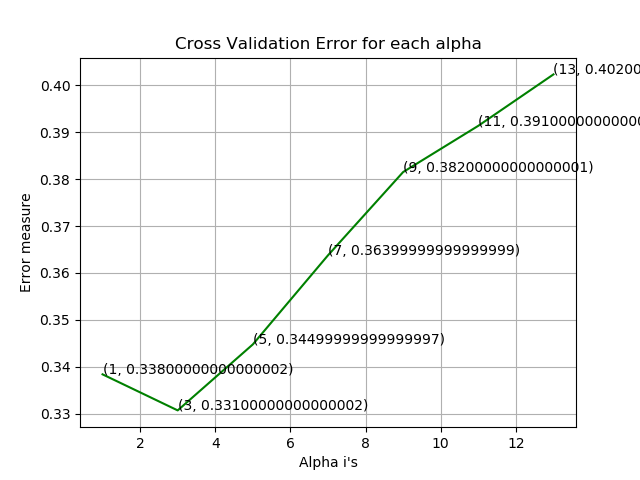

For values of best alpha =  3 The train log loss is: 0.179611593187
For values of best alpha =  3 The cross validation log loss is: 0.330712690607
For values of best alpha =  3 The test log loss is: 0.324479288311
Number of misclassified points  8.41766329347
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


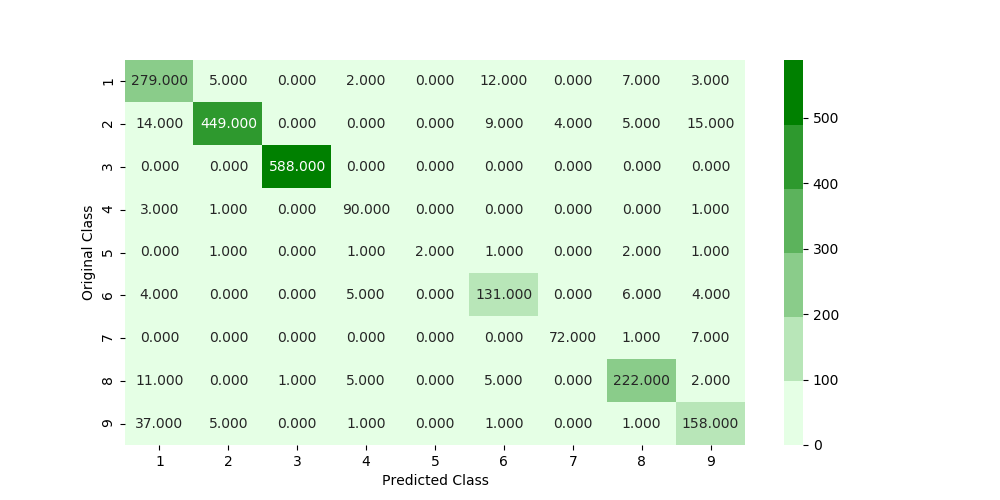

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


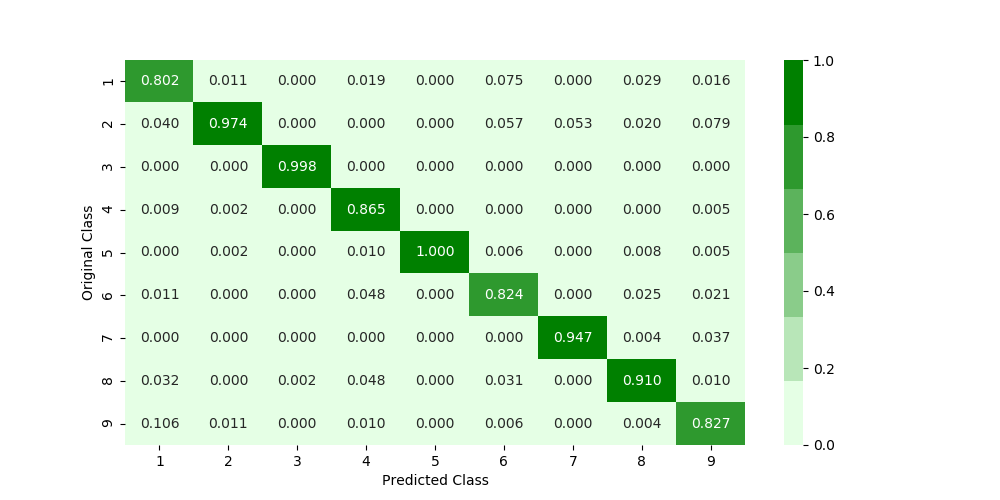

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


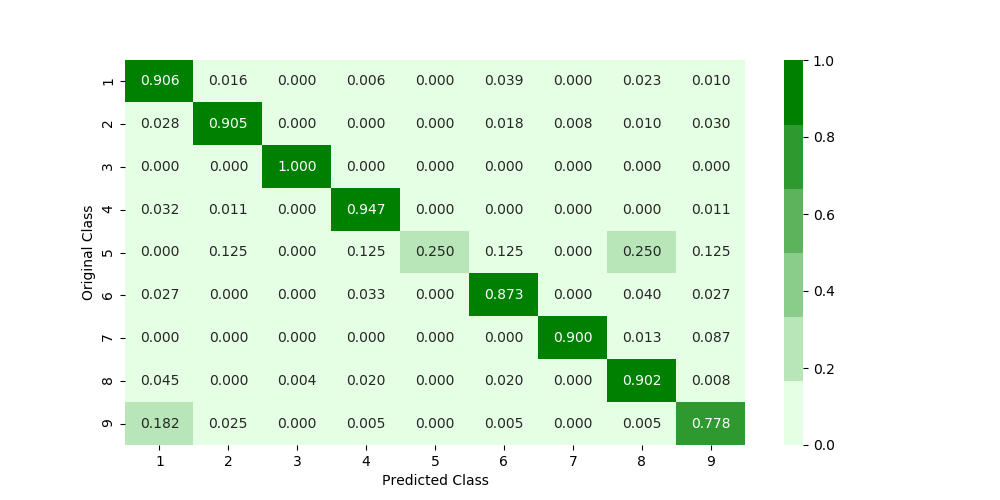

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [28]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.56588746387
log_loss for c =  0.0001 is 1.56994948986
log_loss for c =  0.001 is 1.53968883906
log_loss for c =  0.01 is 1.03546580198
log_loss for c =  0.1 is 0.881103032577
log_loss for c =  1 is 0.737762821171
log_loss for c =  10 is 0.625863654276
log_loss for c =  100 is 0.578662911373
log_loss for c =  1000 is 0.660144293027


<IPython.core.display.Javascript object>


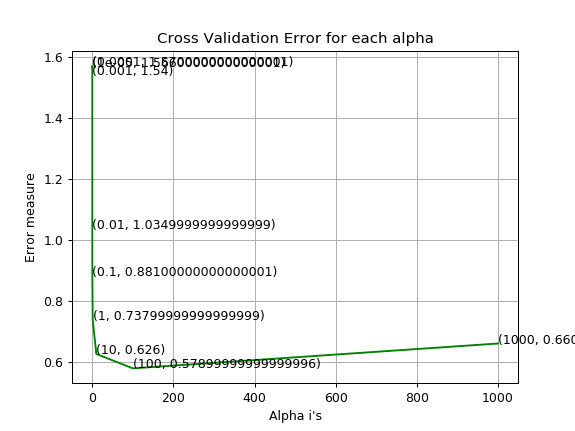

log loss for train data 0.4866305725
log loss for cv data 0.578662911373
log loss for test data 0.552726464108
Number of misclassified points  12.0515179393
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


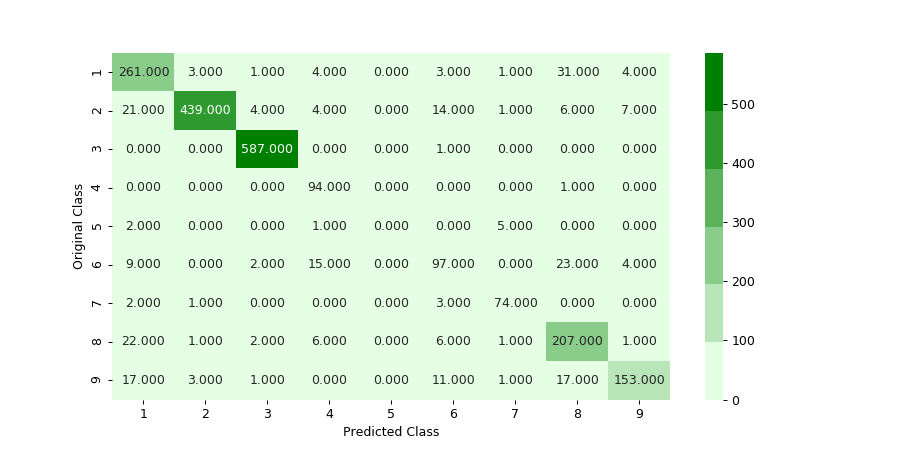

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


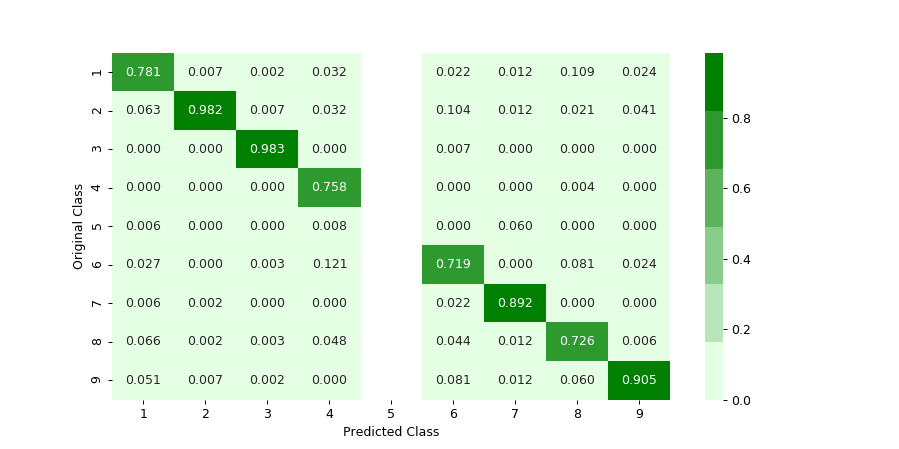

Sum of columns in precision matrix [  1.   1.   1.   1.  nan   1.   1.   1.   1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


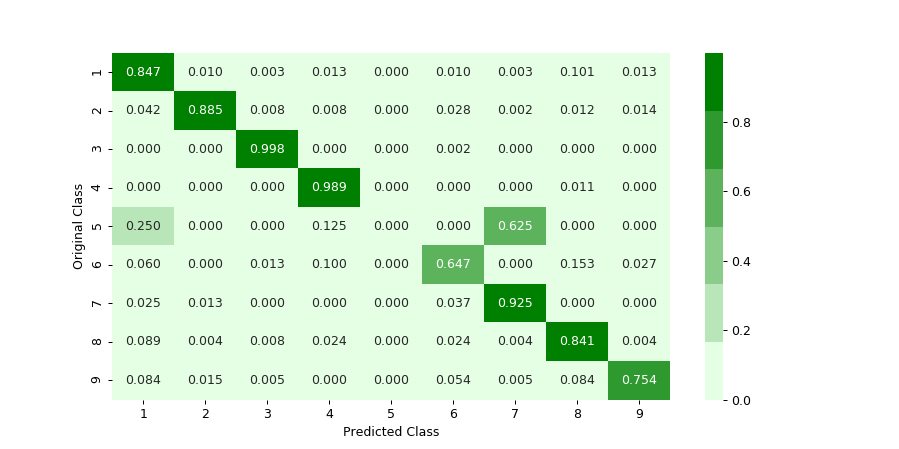

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [64]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.107462762574
log_loss for c =  50 is 0.0963861113765
log_loss for c =  100 is 0.0956968272019
log_loss for c =  500 is 0.0949894355173
log_loss for c =  1000 is 0.0952718756801
log_loss for c =  2000 is 0.0957336631825
log_loss for c =  3000 is 0.0955973188669


<IPython.core.display.Javascript object>


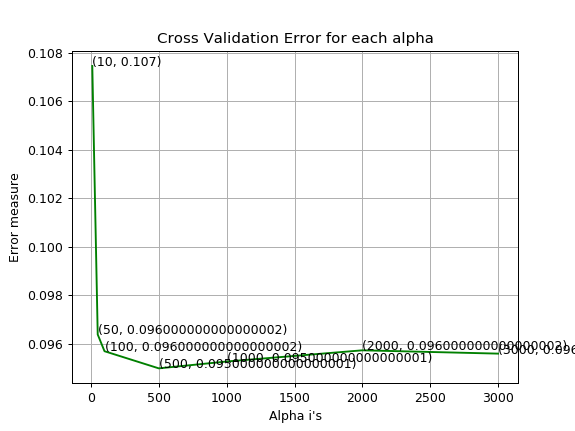

For values of best alpha =  500 The train log loss is: 0.0268847487143
For values of best alpha =  500 The cross validation log loss is: 0.0949894355173
For values of best alpha =  500 The test log loss is: 0.0921036783954
Number of misclassified points  2.16191352346
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


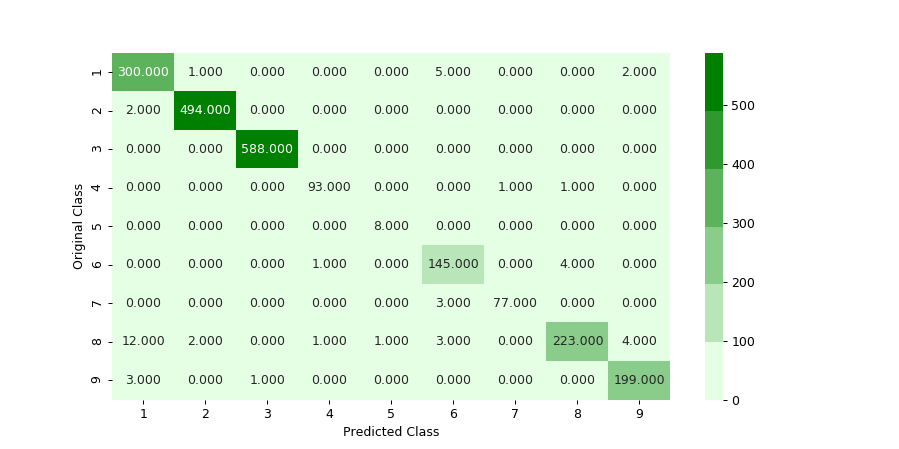

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


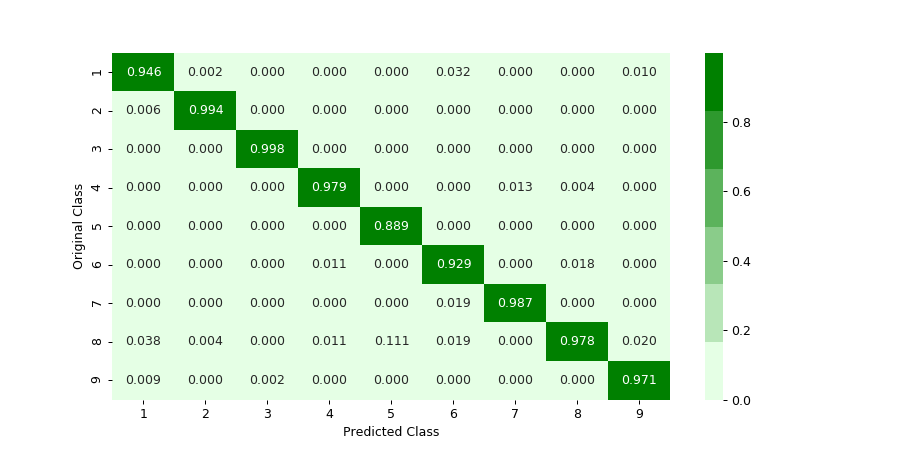

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


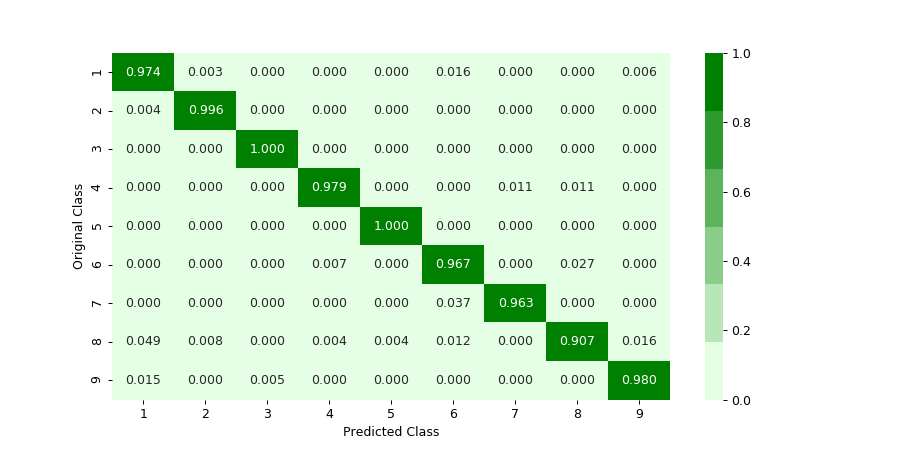

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [65]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.206159544125
log_loss for c =  50 is 0.129455149323
log_loss for c =  100 is 0.102294484826
log_loss for c =  500 is 0.0904747731006
log_loss for c =  1000 is 0.0903691924601
log_loss for c =  2000 is 0.0896983542262


<IPython.core.display.Javascript object>


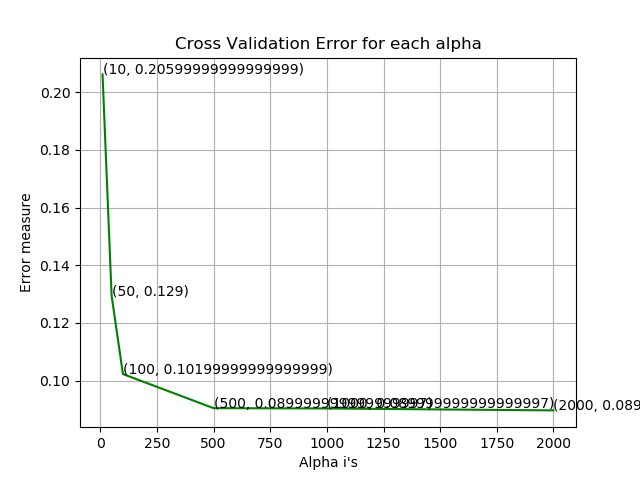

For values of best alpha =  2000 The train log loss is: 0.0241001398152
For values of best alpha =  2000 The cross validation log loss is: 0.0896983542262
For values of best alpha =  2000 The test log loss is: 0.0851653029101
Number of misclassified points  1.65593376265
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


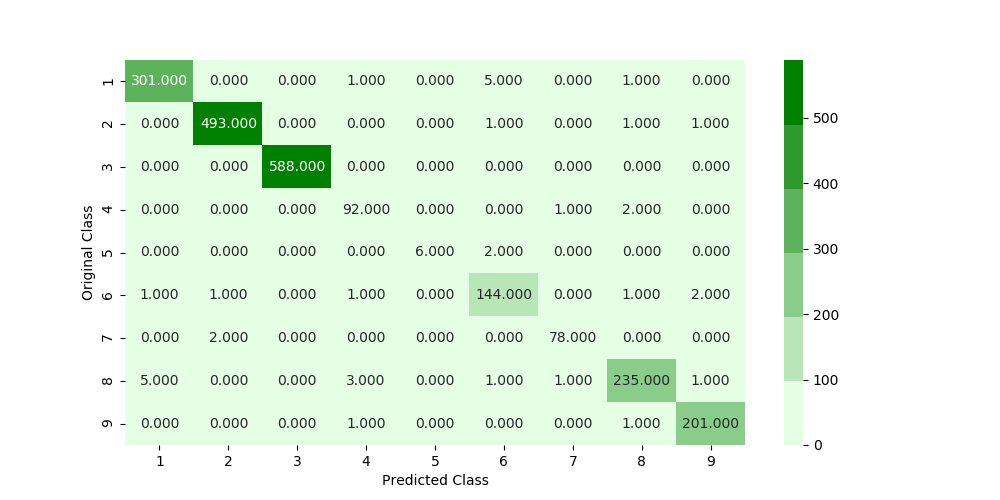

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


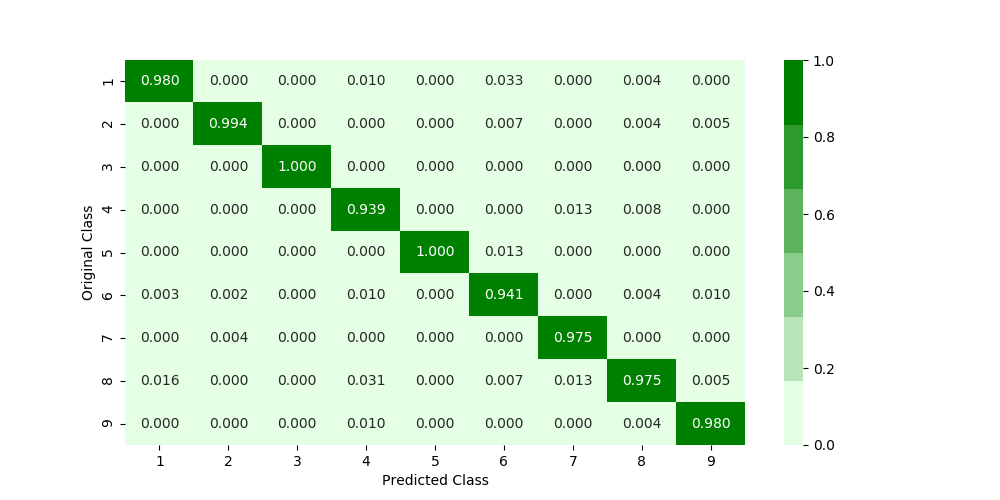

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


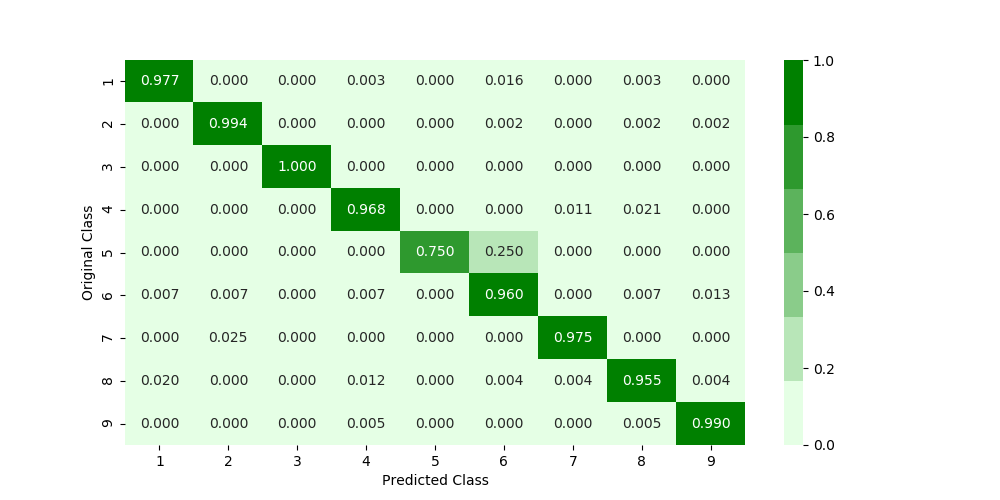

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [29]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [67]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 32.9min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 35.5min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [68]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 1}


In [69]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=500, learning_rate=0.15, colsample_bytree=1, max_depth=10)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.0243344106781
cv loss 0.0888925871246
test loss 0.0825722842198


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [0]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [0]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [31]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...    edx  esi  eax  ebx  ecx  edi  ebp  esp  \
0      323        0       3  ...     18   66   15   43   83    0   17   48   
1        0        0       3  ...     18   29   48   82   12    0   14    0   
2      145        0       3  ...     13   42   10   67   14    0   11    0   
3        0        0       3  ...      6    8   14    7    2    0    8    0   
4        0        0       3  ...     12    9   18   29    5    0   11    0   

   eip  Class  
0   29      1  
1   20      1  
2    9      1  
3    6      1  
4   11      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [0]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

   Class                    ID       size
0      9  01azqd4InC7m9JpocGv5  56.229886
1      2  01IsoiSMh5gxyDYTl4CB  13.999378
2      9  01jsnpXSAlgw6aPeDxrU   8.507785
3      1  01kcPWA9K2BOxQeS5Rju   0.078190
4      8  01SuzwMJEIXsK7A8dQbl   0.996723


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


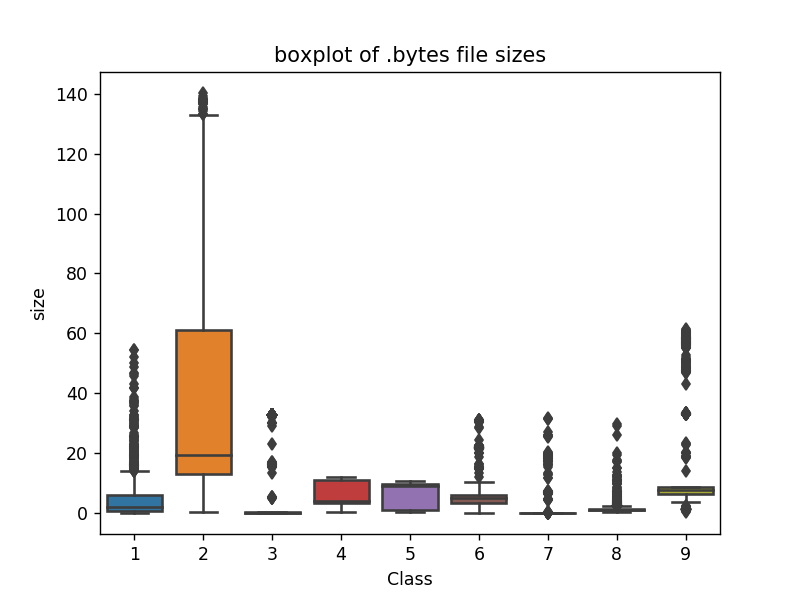

In [0]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [0]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:    ...     esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3    ...      66   15   43   83    0   17   48   29   
1        0        0       3    ...      29   48   82   12    0   14    0   20   
2      145        0       3    ...      42   10   67   14    0   11    0    9   
3        0        0       3    ...       8   14    7    2    0    8    0    6   
4        0        0       3    ...       9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [32]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...         edx       esi       eax       ebx  \
0  0.000084      0.0  0.000072  ...    0.000343  0.000746  0.000301  0.000360   
1  0.000000      0.0  0.000072  ...    0.000343  0.000328  0.000965  0.000686   
2  0.000038      0.0  0.000072  ...    0.000248  0.000475  0.000201  0.000560   
3  0.000000      0.0  0.000072  ...    0.000114  0.000090  0.000281  0.000059   
4  0.000000      0.0  0.000072  ...    0.000229  0.000102  0.000362  0.000243   

        ecx  edi       ebp       esp       eip  Class  
0  0.001057  0.0  0.030797  0.001468  0.003173      1  
1  0.000153  0.0  0.025362  0.000000  0.002188      1  
2  0.000178  0.0  0.019928  0.000000  0.000985      1  
3  0.000025  0.0  0.014493  0.000000  0.000657      1  
4  0.000064  0.0  0.019928  0.000000  0.001204      1  

[5 rows x 53 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


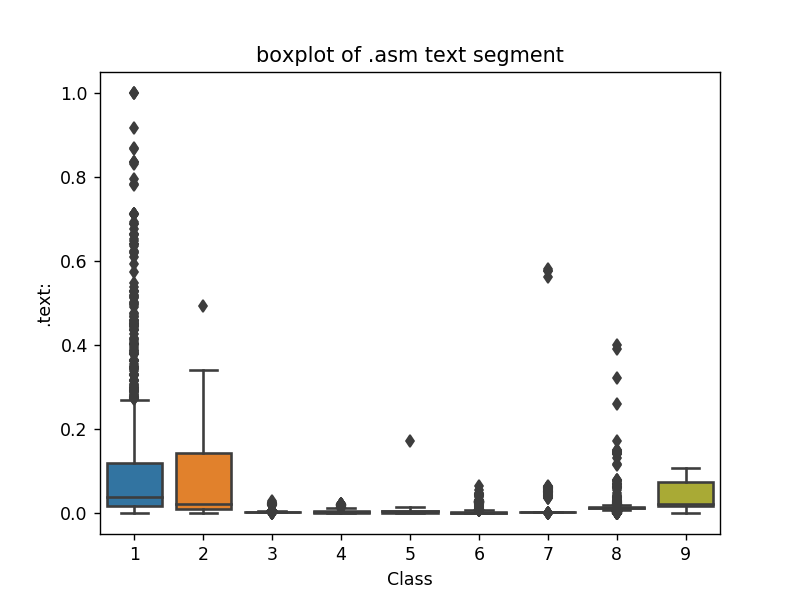

In [0]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


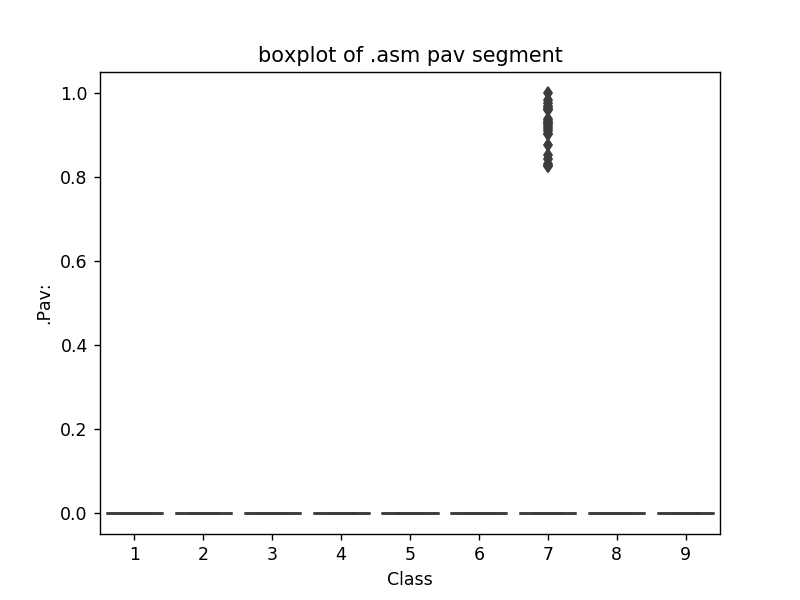

In [0]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


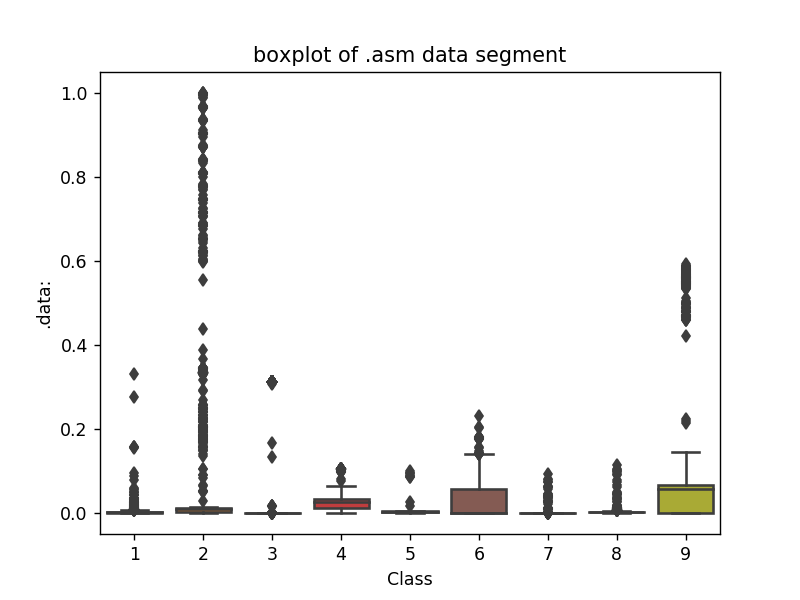

In [0]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


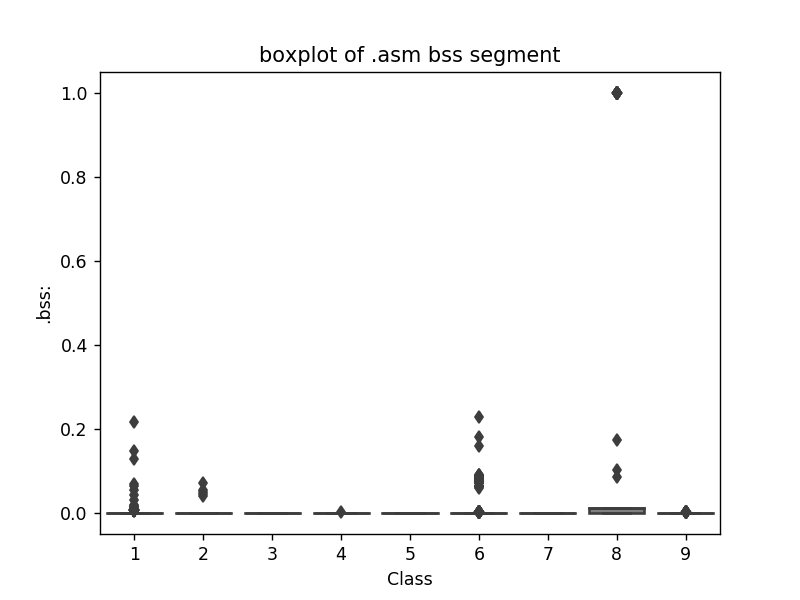

In [0]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


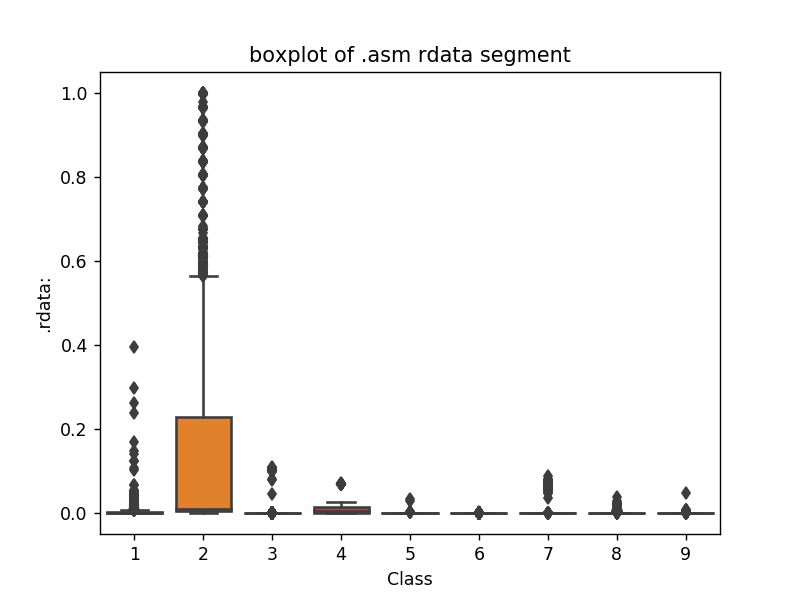

In [0]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


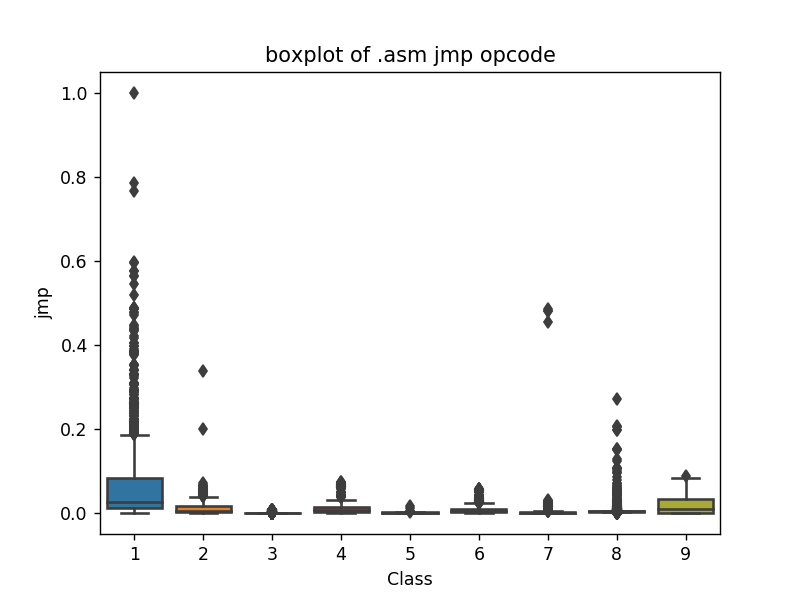

In [0]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


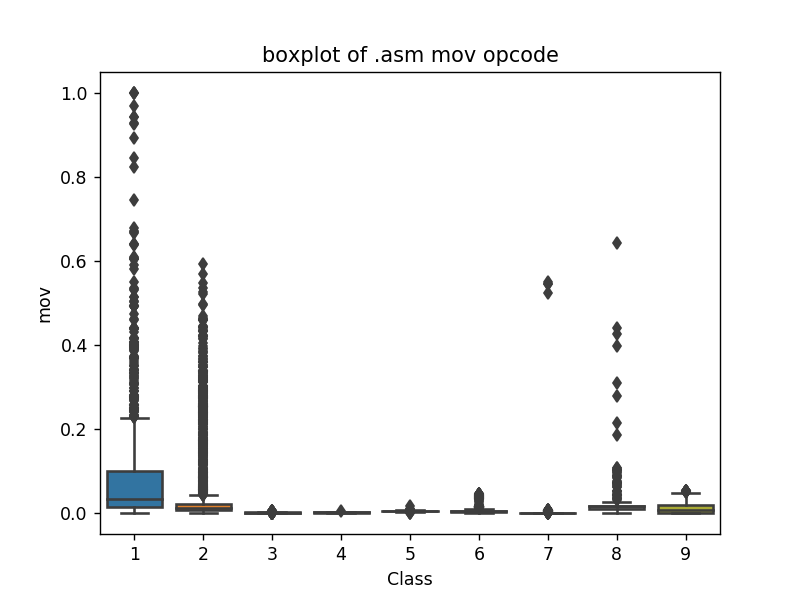

In [0]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


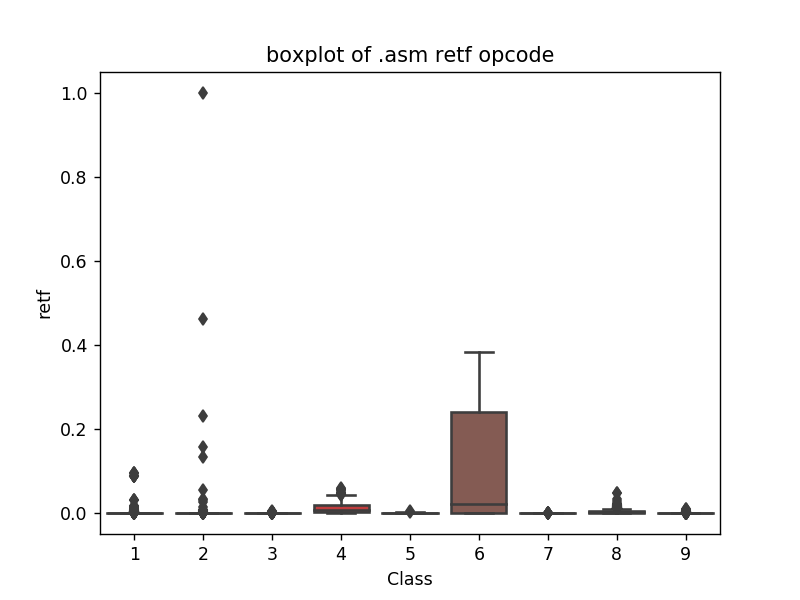

In [0]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


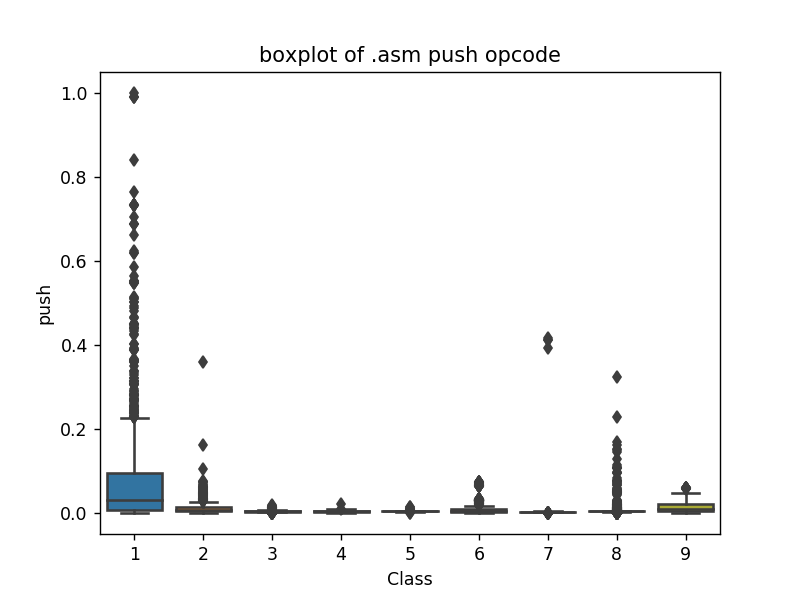

In [0]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


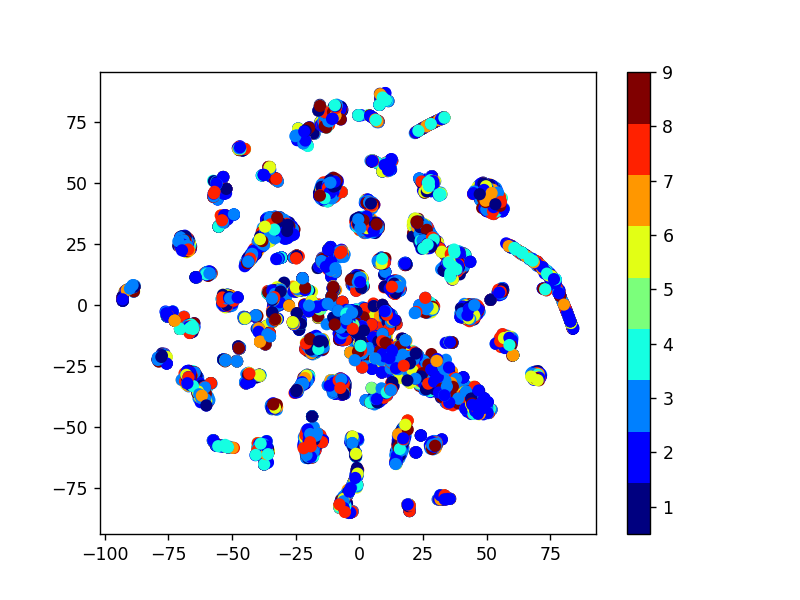

In [0]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


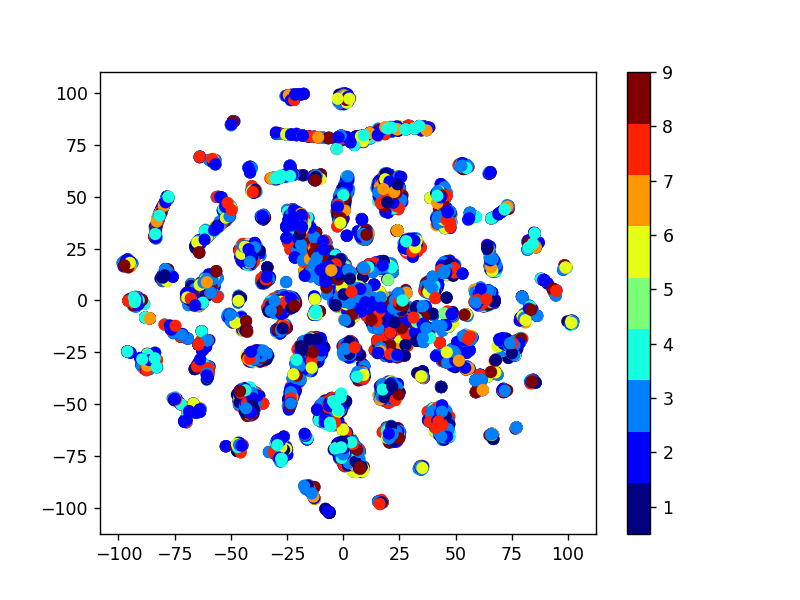

In [0]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [0]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [0]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [0]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.104531321344
log_loss for k =  3 is 0.0958800580948
log_loss for k =  5 is 0.0995466557335
log_loss for k =  7 is 0.107227274345
log_loss for k =  9 is 0.119239543547
log_loss for k =  11 is 0.133926642781
log_loss for k =  13 is 0.147643793967
log_loss for k =  15 is 0.159439699615
log_loss for k =  17 is 0.16878376444
log_loss for k =  19 is 0.178020728839


<IPython.core.display.Javascript object>


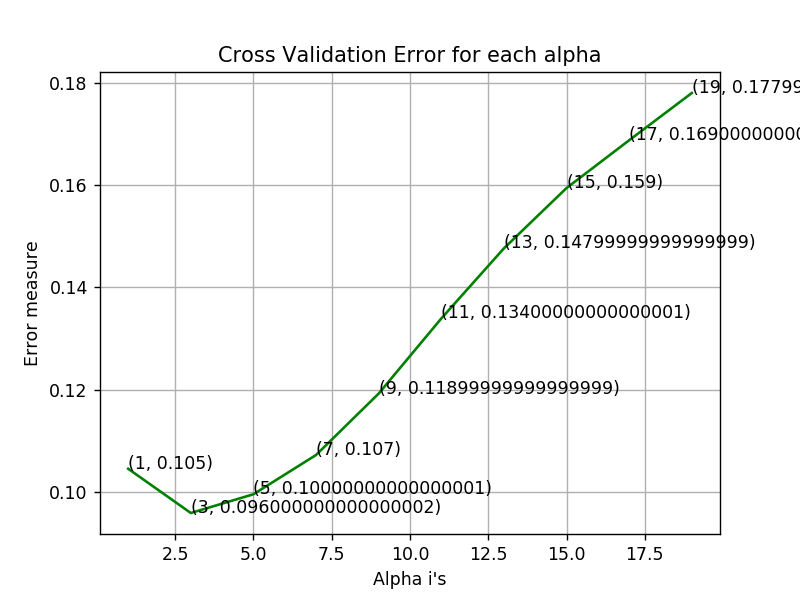

log loss for train data 0.0476773462198
log loss for cv data 0.0958800580948
log loss for test data 0.0894810720832
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


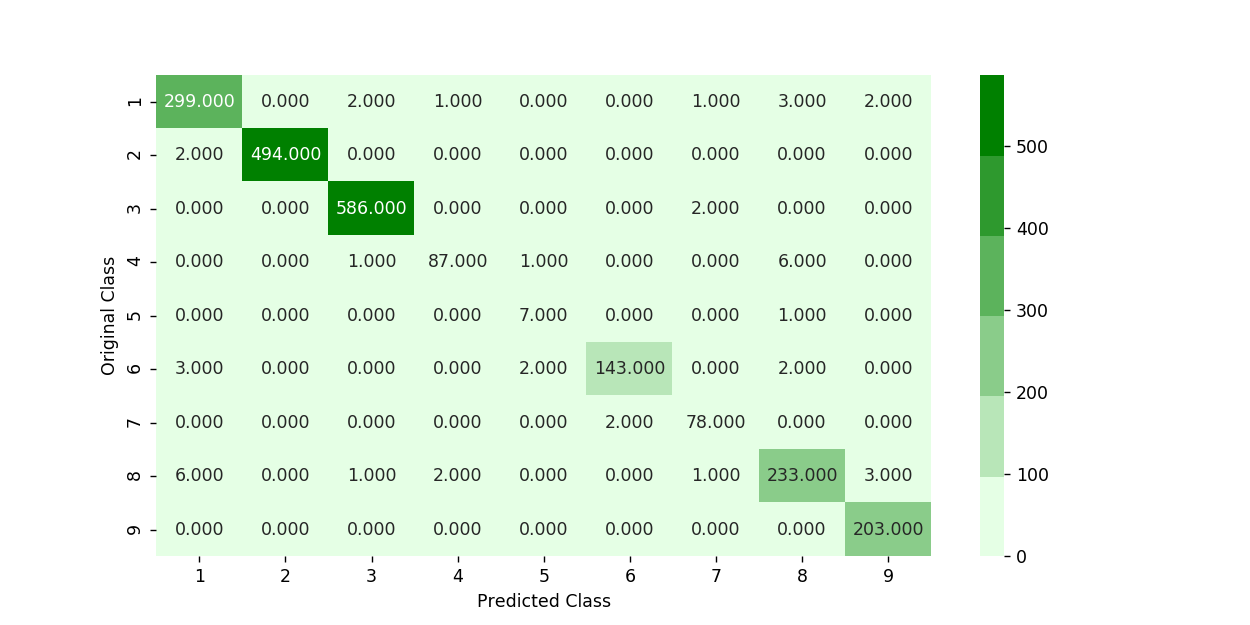

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


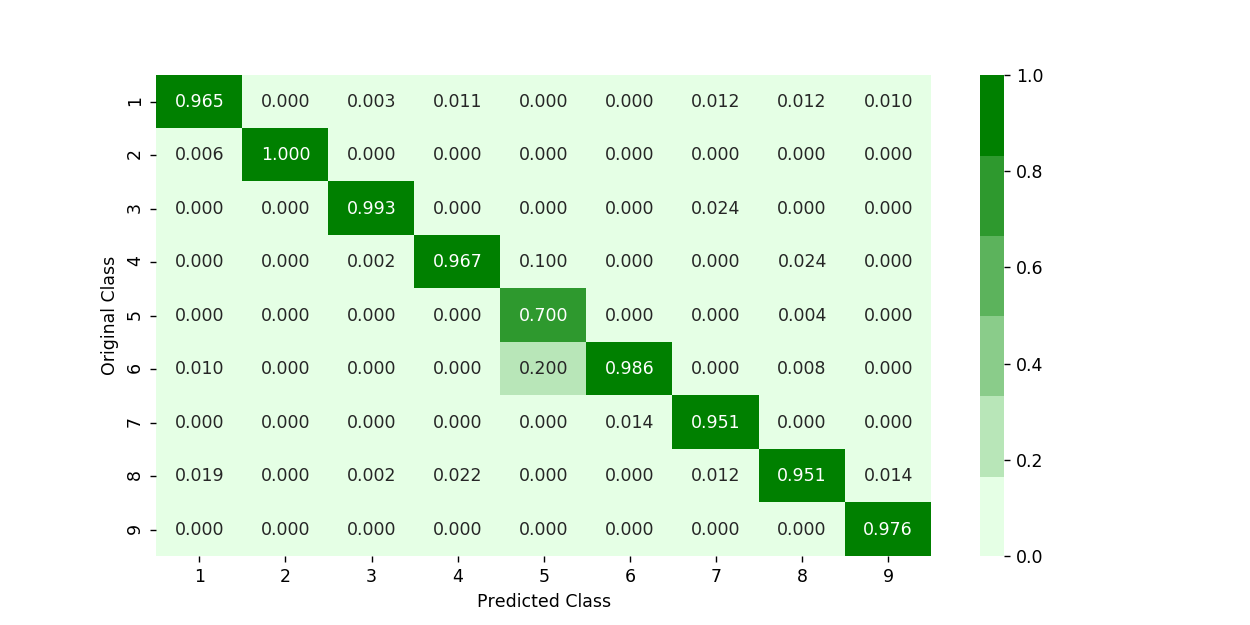

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


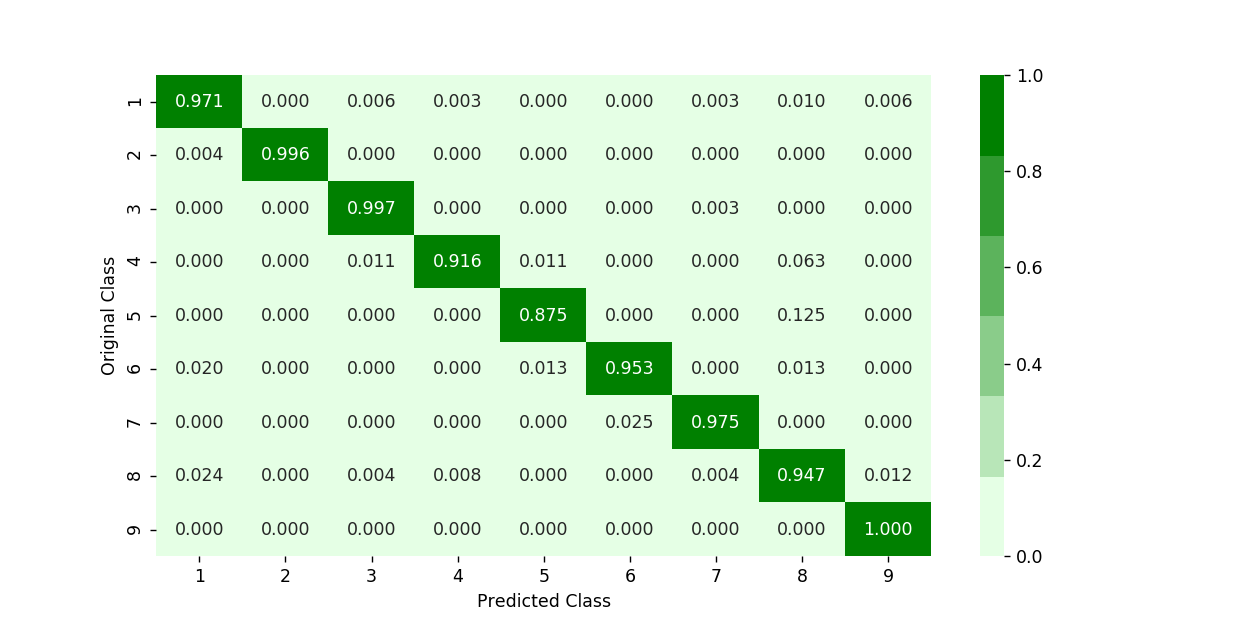

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.58867274165
log_loss for c =  0.0001 is 1.54560797884
log_loss for c =  0.001 is 1.30137786807
log_loss for c =  0.01 is 1.33317456931
log_loss for c =  0.1 is 1.16705751378
log_loss for c =  1 is 0.757667807779
log_loss for c =  10 is 0.546533939819
log_loss for c =  100 is 0.438414998062
log_loss for c =  1000 is 0.424423536526


<IPython.core.display.Javascript object>


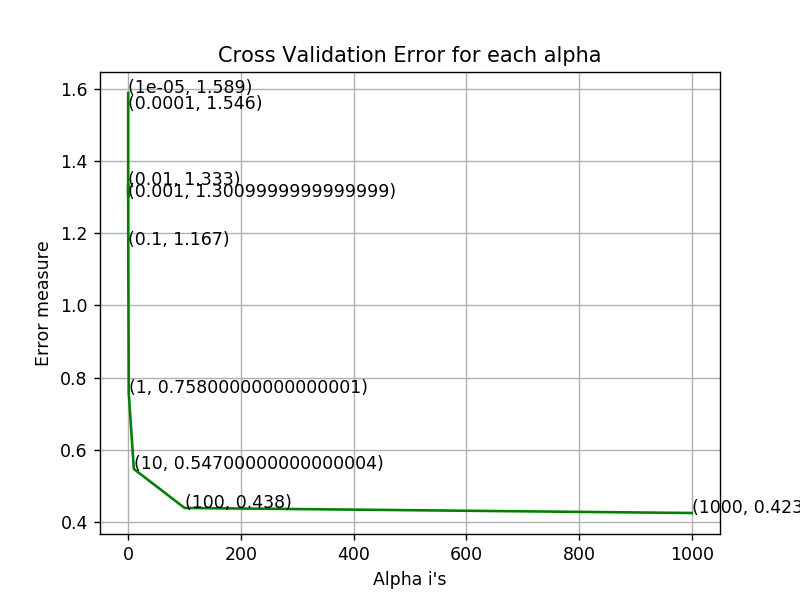

log loss for train data 0.396219394701
log loss for cv data 0.424423536526
log loss for test data 0.415685592517
Number of misclassified points  9.61361545538
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


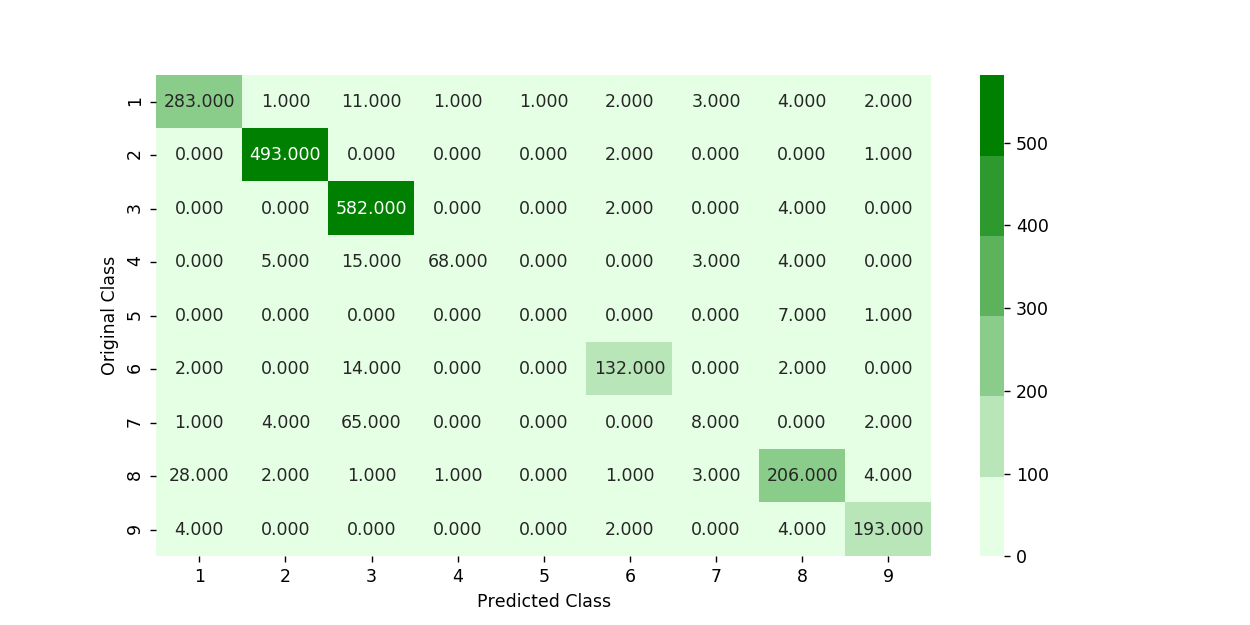

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


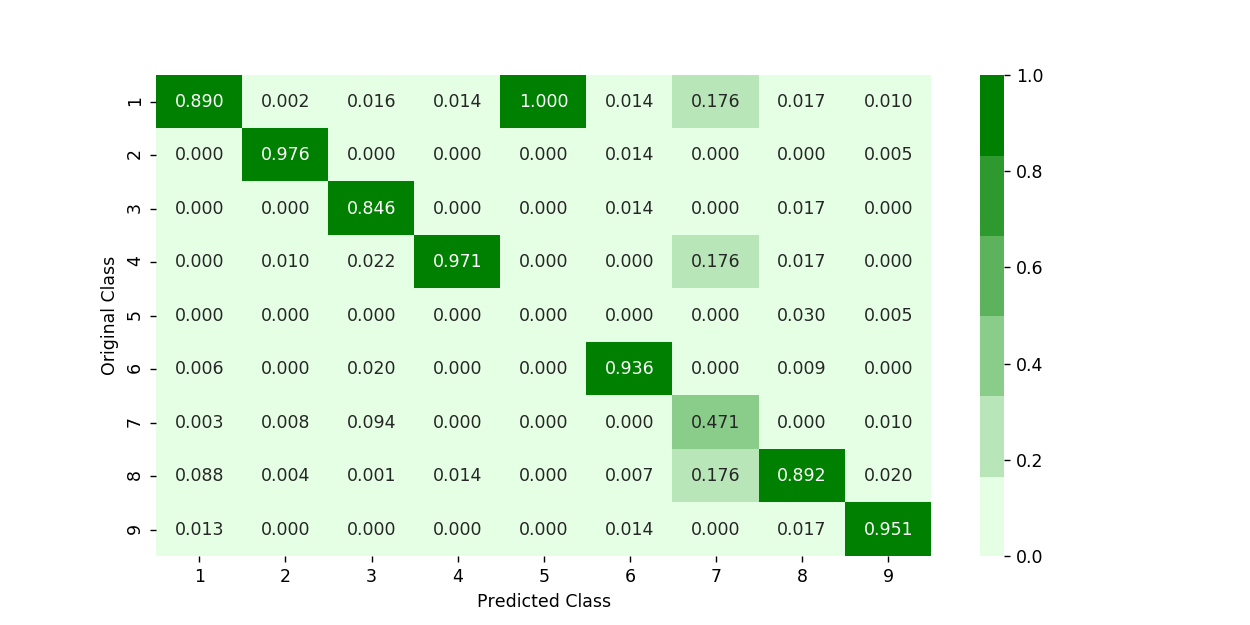

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


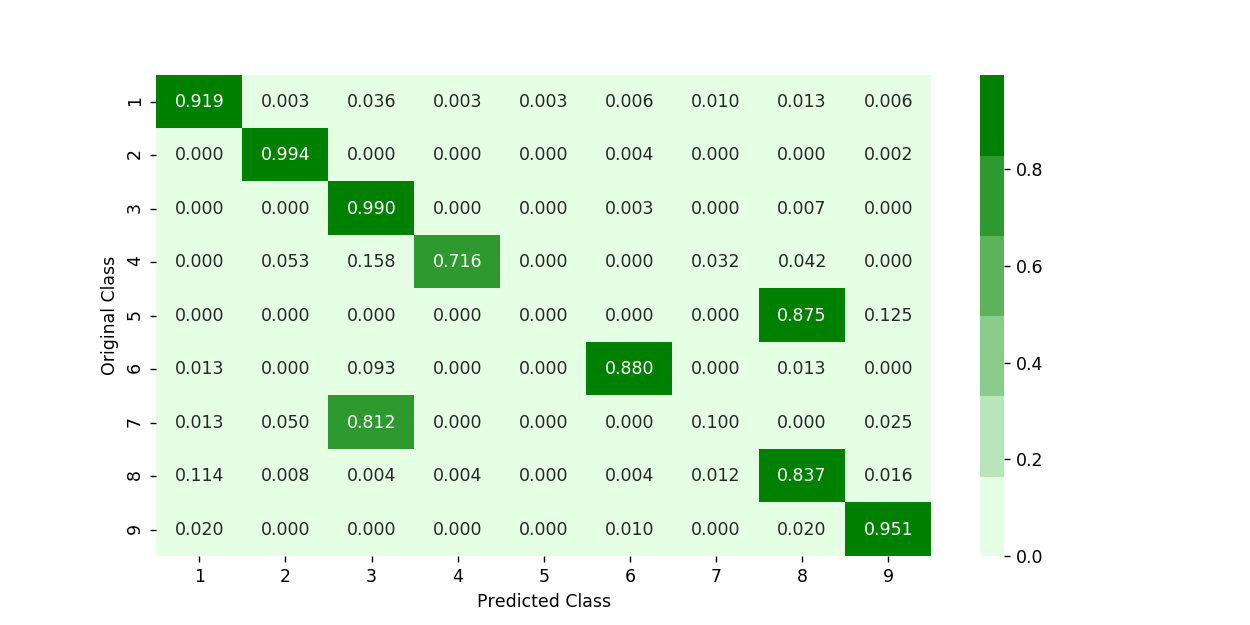

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.0581657906023
log_loss for c =  50 is 0.0515443148419
log_loss for c =  100 is 0.0513084973231
log_loss for c =  500 is 0.0499021761479
log_loss for c =  1000 is 0.0497972474298
log_loss for c =  2000 is 0.0497091690815
log_loss for c =  3000 is 0.0496706817633


<IPython.core.display.Javascript object>


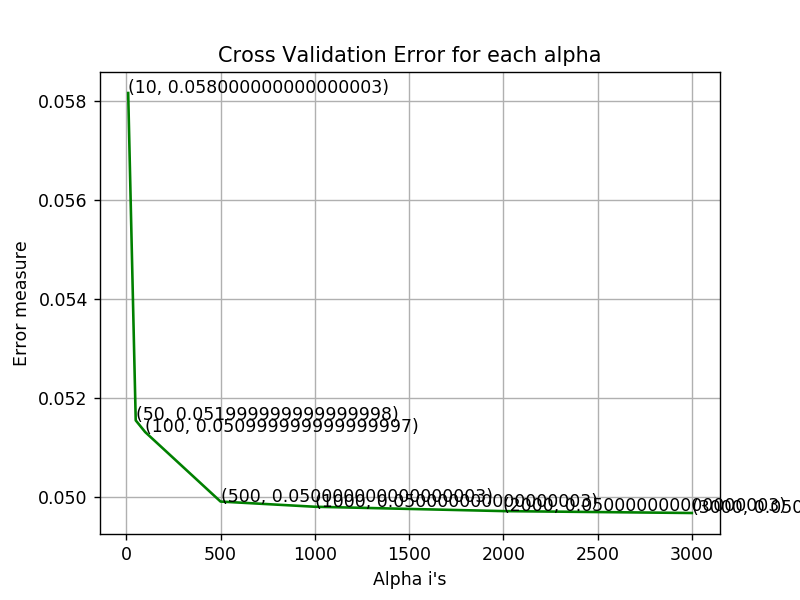

log loss for train data 0.0116517052676
log loss for cv data 0.0496706817633
log loss for test data 0.0571239496453
Number of misclassified points  1.14995400184
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


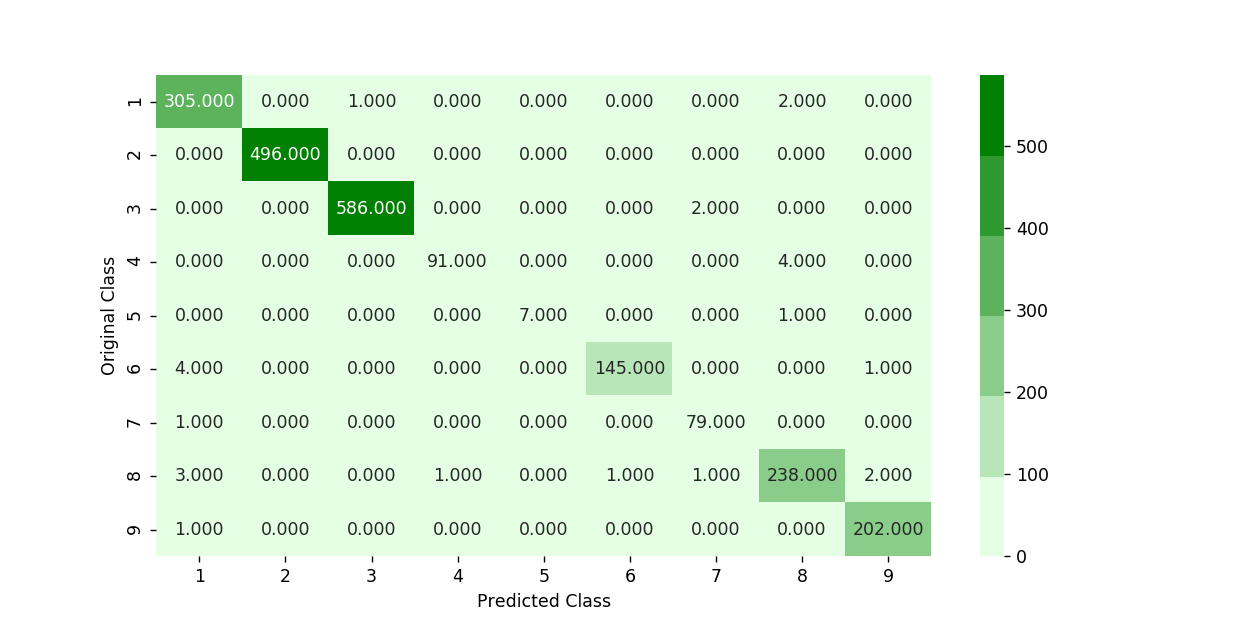

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


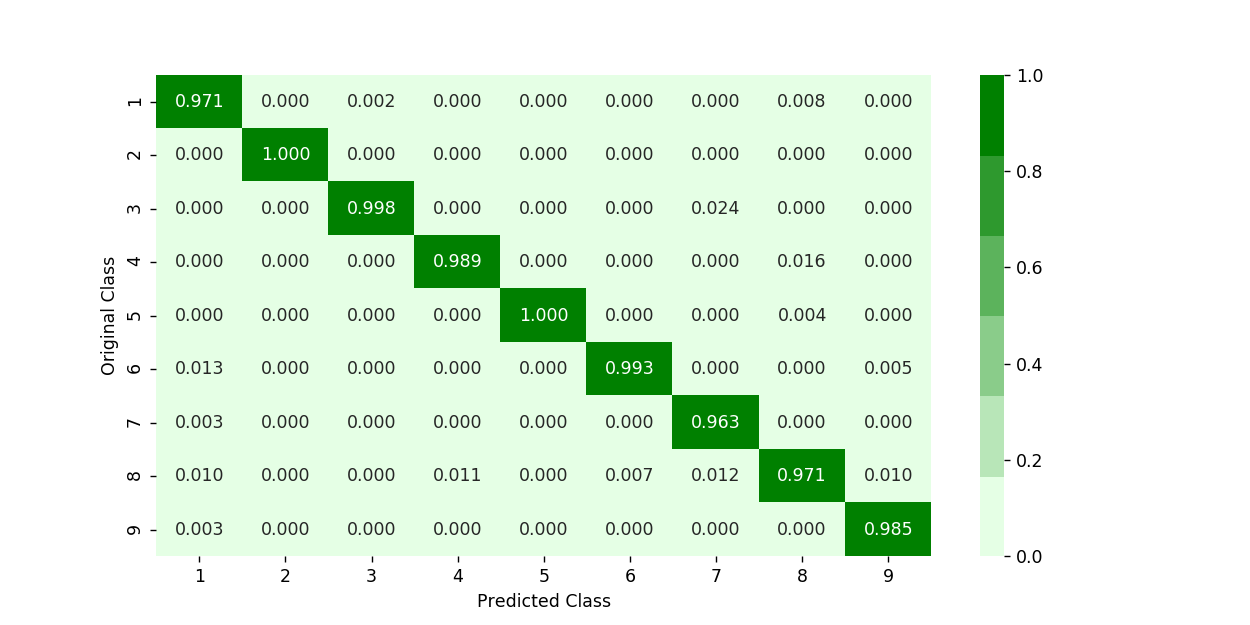

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


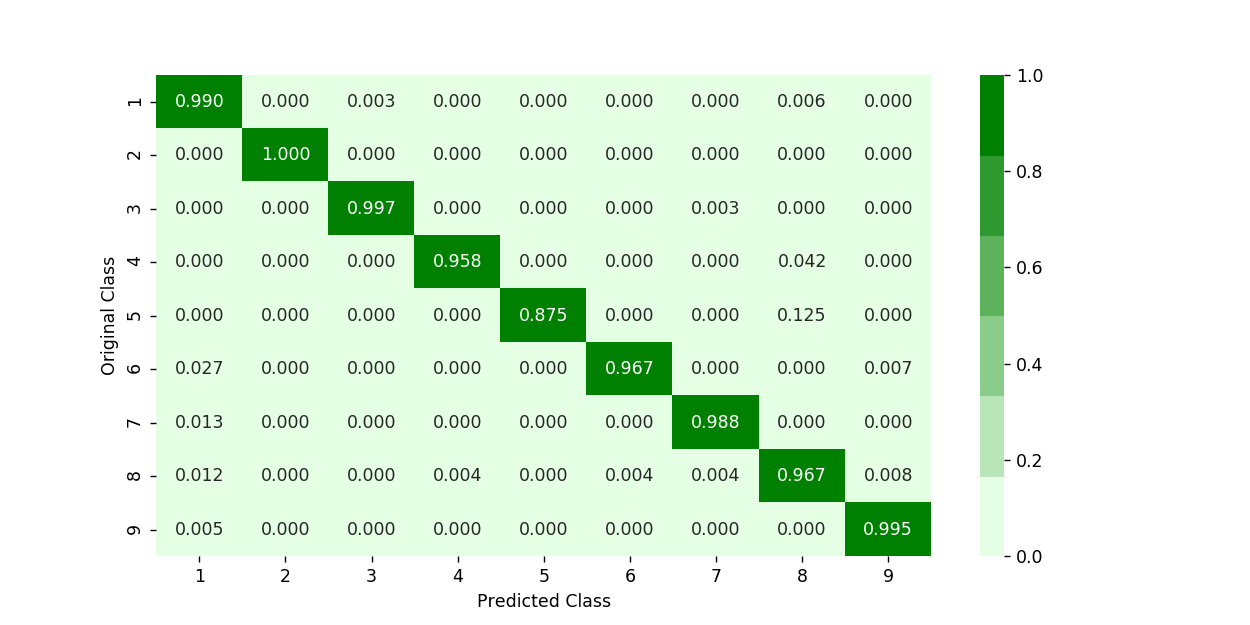

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.104344888454
log_loss for c =  50 is 0.0567190635611
log_loss for c =  100 is 0.056075038646
log_loss for c =  500 is 0.057336051683
log_loss for c =  1000 is 0.0571265109903
log_loss for c =  2000 is 0.057103406781
log_loss for c =  3000 is 0.0567993215778


<IPython.core.display.Javascript object>


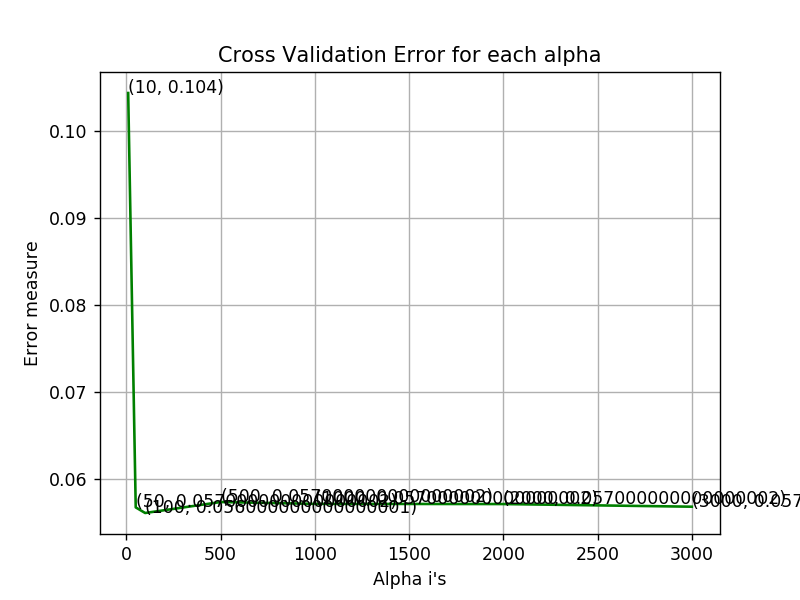

For values of best alpha =  100 The train log loss is: 0.0117883742574
For values of best alpha =  100 The cross validation log loss is: 0.056075038646
For values of best alpha =  100 The test log loss is: 0.0491647763845
Number of misclassified points  0.873965041398
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


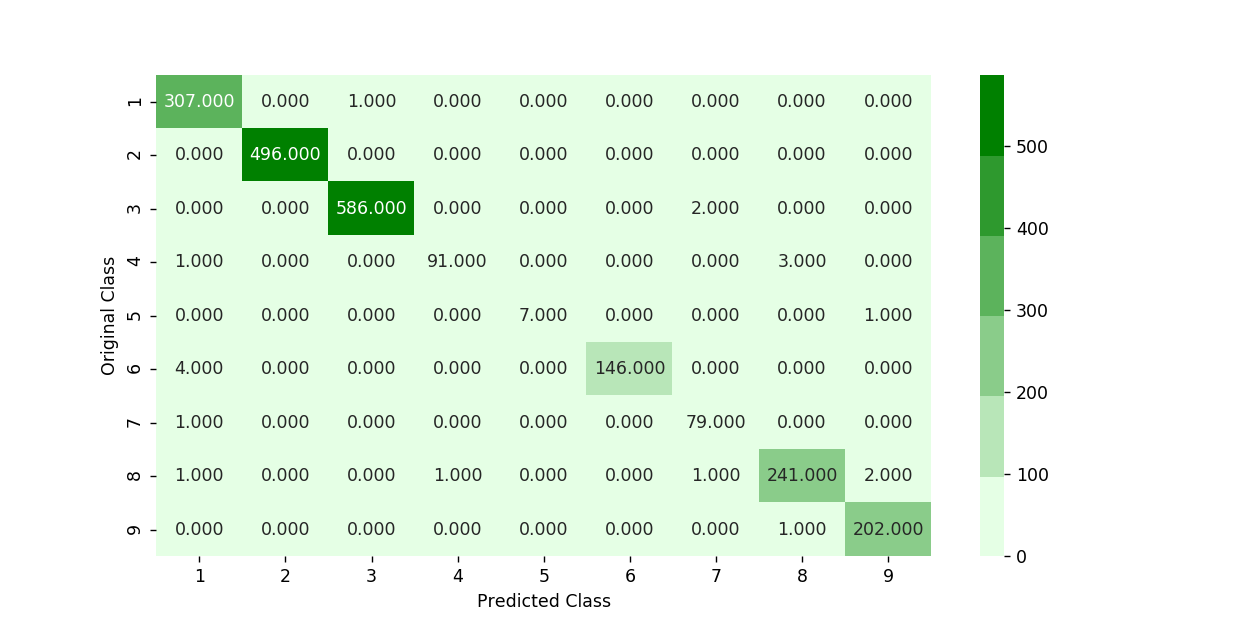

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


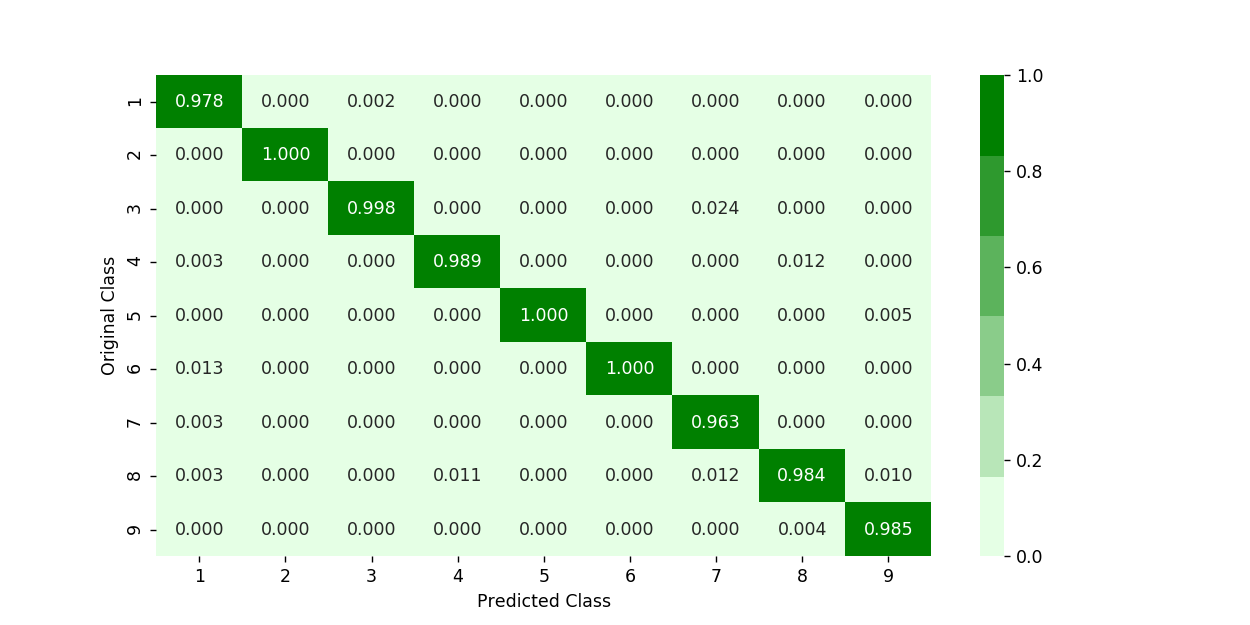

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


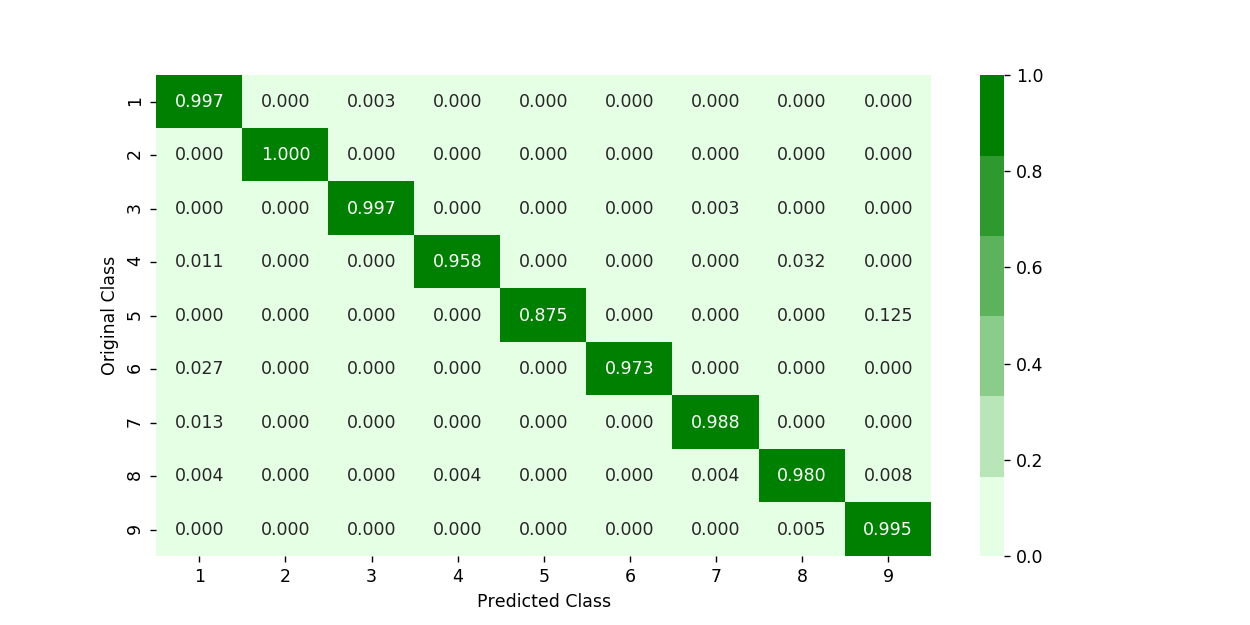

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.3min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.0102661325822
cv loss 0.0501201796687
test loss 0.0483908764397


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [0]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8    ...           f9        fa  \
0  0.001835  0.002058  0.002946  0.002638    ...     0.013560  0.013107   
1  0.003873  0.004747  0.006984  0.008267    ...     0.001920  0.001147   
2  0.005280  0.005078  0.002155  0.008104    ...     0.009804  0.011777   
3  0.000354  0.000310  0.000481  0.000959    ...     0.002121  0.001886   
4  0.000232  0.000148  0.000229  0.000376    ...     0.001530  0.000853   

         fb        fc        fd        fe        ff        ??  Class      size  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129      9  0.092219  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606      2  0.121236  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033      9  0.084499  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984      1  0.010759  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636      8  0.006233  

[5 rows x 260 columns]

In [33]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...         edx       esi       eax       ebx  \
0  0.000084      0.0  0.000072  ...    0.000343  0.000746  0.000301  0.000360   
1  0.000000      0.0  0.000072  ...    0.000343  0.000328  0.000965  0.000686   
2  0.000038      0.0  0.000072  ...    0.000248  0.000475  0.000201  0.000560   
3  0.000000      0.0  0.000072  ...    0.000114  0.000090  0.000281  0.000059   
4  0.000000      0.0  0.000072  ...    0.000229  0.000102  0.000362  0.000243   

        ecx  edi       ebp       esp       eip  Class  
0  0.001057  0.0  0.030797  0.001468  0.003173      1  
1  0.000153  0.0  0.025362  0.000000  0.002188      1  
2  0.000178  0.0  0.019928  0.000000  0.000985      1  
3  0.000025  0.0  0.014493  0.000000  0.000657      1  
4  0.000064  0.0  0.019928  0.000000  0.001204      1  

[5 rows x 53 columns]

In [0]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [34]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0 1   1 2   2 3   3 4   4 5   5 6   6 7   7 8   8 9  9 0a    ...     \
0  601905  3905  2816  3832  3345  3242  3650  3201  2965  3205    ...      
1   39755  8337  7249  7186  8663  6844  8420  7589  9291   358    ...      
2   93506  9542  2568  2438  8925  9330  9007  2342  9107  2457    ...      
3   21091  1213   726   817  1257   625   550   523  1078   473    ...      
4   19764   710   302   433   559   410   262   249   422   223    ...      

     :dword       edx       esi       eax       ebx       ecx  edi       ebp  \
0  0.032784  0.015418  0.025875  0.025744  0.004910  0.008930  0.0  0.027174   
1  0.010846  0.004961  0.012316  0.007858  0.007570  0.005350  0.0  0.043478   
2  0.006773  0.000095  0.006181  0.000100  0.003773  0.000713  0.0  0.048913   
3  0.001028  0.000343  0.000746  0.000301  0.000360  0.001057  0.0  0.030797   
4  0.009150  0.000343  0.013875  0.000482  0.012932  0.001363  0.0  0.027174   

        esp       eip  
0  0.000428  0.049896  
1  0.000673  0.024839  
2  0.000000  0.012802  
3  0.001468  0.003173  
4  0.000000  0.008316  

[5 rows x 306 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


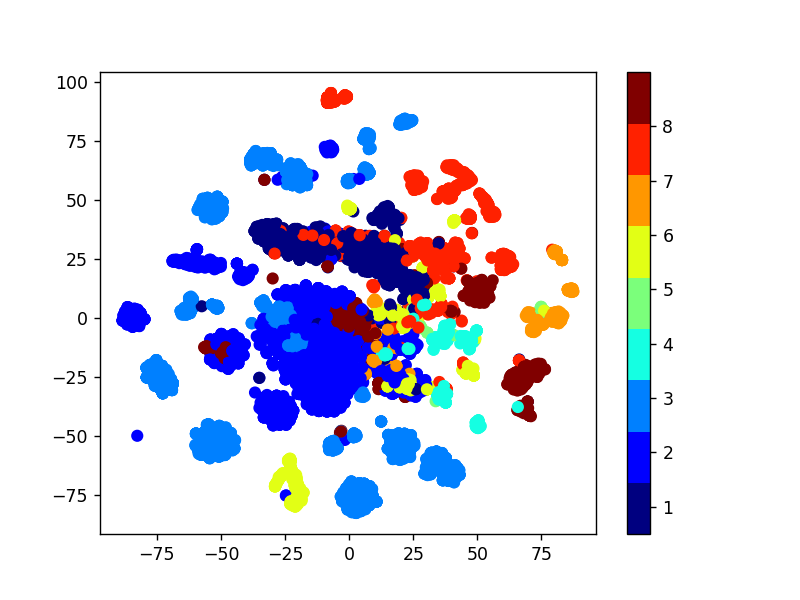

In [0]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x, axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [35]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.0461221662017
log_loss for c =  50 is 0.0375229563452
log_loss for c =  100 is 0.0359765822455
log_loss for c =  500 is 0.0358291883873
log_loss for c =  1000 is 0.0358403093496
log_loss for c =  2000 is 0.0357908022178
log_loss for c =  3000 is 0.0355909487962


<IPython.core.display.Javascript object>


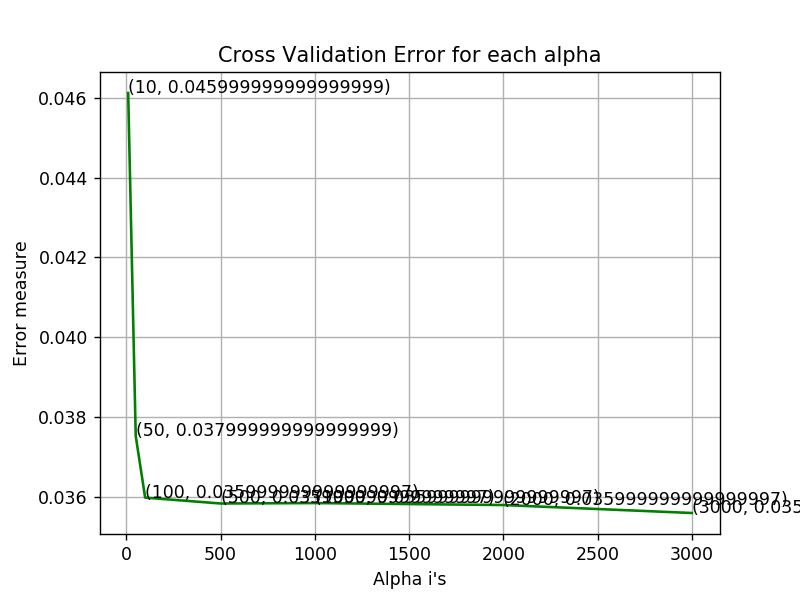

For values of best alpha =  3000 The train log loss is: 0.0166267614753
For values of best alpha =  3000 The cross validation log loss is: 0.0355909487962
For values of best alpha =  3000 The test log loss is: 0.0401141303589


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.0898979446265
log_loss for c =  50 is 0.0536946658041
log_loss for c =  100 is 0.0387968186177
log_loss for c =  500 is 0.0347960327293
log_loss for c =  1000 is 0.0334668083237
log_loss for c =  2000 is 0.0316569078846
log_loss for c =  3000 is 0.0315972694477


<IPython.core.display.Javascript object>


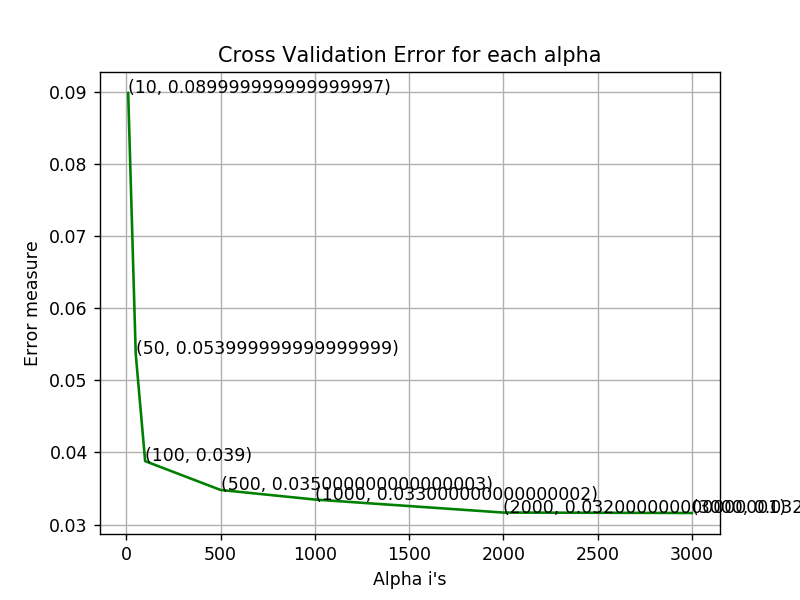

For values of best alpha =  3000 The train log loss is: 0.0111918809342
For values of best alpha =  3000 The cross validation log loss is: 0.0315972694477
For values of best alpha =  3000 The test log loss is: 0.0323978515915


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  4.5min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  5.8min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  6.7min remaining:   44.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.4min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.3}


In [0]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

For values of best alpha =  3000 The train log loss is: 0.0121922832297
For values of best alpha =  3000 The cross validation log loss is: 0.0344955487471
For values of best alpha =  3000 The test log loss is: 0.0317041132442


<h3> 4.5.6. XgBoost Classifier with feature engineering </h3>

In [26]:
# Refer https://github.com/dchad/malware-detection
data = pd.read_csv('final-combined-train-data-30percent.csv')
labels = pd.read_csv('sorted-train-labels.csv')
datapoly = pd.read_csv('final-combined-train-data-30percent-poly.csv')

In [27]:
data.head()

filename   edx   esi  es  ds  ss  cs  ah   al  ax  \
0  01IsoiSMh5gxyDYTl4CB   750   496   3   0   0   0   8  224  49   
1  01SuzwMJEIXsK7A8dQbl  1121    24   3   1   4   2   6   22   7   
2  01azqd4InC7m9JpocGv5  1493  1900   0   0   0   0   1  398   0   
3  01jsnpXSAlgw6aPeDxrU   525     4   0   0   0   0   0    0   0   
4  01kcPWA9K2BOxQeS5Rju    23    35   0   0   0   0   0    3   0   

       ...        ASM_964  ASM_972  ASM_977  ASM_990   trainmean  \
0      ...             32       49       53       10  586.160040   
1      ...             48        9        9      116    5.908549   
2      ...             48        9        9      116    7.002982   
3      ...             48        9        9      116  327.150099   
4      ...             48       89       32       71    5.932406   

       trainstd  trainmin  trainmax    traintotal  trainlogtotal  
0  12877.609022       0.0  288961.0  2.181176e+12      28.410885  
1     60.063976       0.0    1068.0  3.790235e+05      12.845354  
2     64.756651       0.0    1173.0  5.319434e+05      13.184292  
3   3278.958529       0.0   81305.0  8.721682e+10      25.191663  
4     60.189034       0.0    1068.0  3.813462e+05      12.851463  

[5 rows x 623 columns]

In [28]:
datapoly.head()

filename   edx   esi  es  ds  ss  cs  ah   al  ax  \
0  01IsoiSMh5gxyDYTl4CB   750   496   3   0   0   0   8  224  49   
1  01SuzwMJEIXsK7A8dQbl  1121    24   3   1   4   2   6   22   7   
2  01azqd4InC7m9JpocGv5  1493  1900   0   0   0   0   1  398   0   
3  01jsnpXSAlgw6aPeDxrU   525     4   0   0   0   0   0    0   0   
4  01kcPWA9K2BOxQeS5Rju    23    35   0   0   0   0   0    3   0   

        ...        train_byte_p1  train_byte_p2  train_byte_p3  train_byte_p4  \
0       ...                  1.0       0.614952      6874624.0       0.378166   
1       ...                  1.0       0.843262       460288.0       0.711091   
2       ...                  1.0       0.703961      5256192.0       0.495561   
3       ...                  1.0       0.806035      4825600.0       0.649692   
4       ...                  1.0       0.871610       712704.0       0.759704   

   train_byte_p5  train_byte_p6  train_byte_p7  train_byte_p8  train_byte_p9  \
0   4.227563e+06   4.726046e+13       0.232554   2.599748e+06   2.906291e+13   
1   3.881435e+05   2.118650e+11       0.599636   3.273068e+05   1.786578e+11   
2   3.700153e+06   2.762755e+13       0.348855   2.604762e+06   1.944871e+13   
3   3.889601e+06   2.328642e+13       0.523674   3.135154e+06   1.876966e+13   
4   6.211998e+05   5.079470e+11       0.662165   5.414439e+05   4.427316e+11   

   train_byte_p10  
0    3.248979e+20  
1    9.751894e+16  
2    1.452157e+20  
3    1.123709e+20  
4    3.620159e+17  

[5 rows x 653 columns]

In [41]:
X = data.iloc[:,1:]
y = np.array(labels.iloc[:,1:] - 1)
Xpoly = datapoly.iloc[:,1:]

In [51]:
from sklearn.cross_validation import cross_val_score, KFold
def run_cv(X,y, clf):

    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True)
    y_prob = np.zeros((len(y),9))
    y_pred = np.zeros(len(y))
    
    
    for train_index, test_index in kf:
        print(train_index, test_index)
        X_train = X.loc[train_index,:]
        X_test = X.loc[test_index,:]
        y_train = y[train_index]

        clf.fit(X_train, y_train.flatten())
        
        y_prob[test_index] = clf.predict_proba(X_test)
        y_pred[test_index] = clf.predict(X_test)
    
    return y_prob, y_pred

C:\Users\abc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
xgclf = XGBClassifier(n_estimators=1000, objective="multi:softmax", nthread=4)
prob, pred = run_cv(Xpoly,y,xgclf)
print("logloss: {:.4f}".format(log_loss(y, prob)))


[    0     1     2 ..., 10865 10866 10867] [    9    13    32 ..., 10821 10829 10854]
[    0     1     2 ..., 10863 10864 10867] [    3    12    22 ..., 10860 10865 10866]
[    1     2     3 ..., 10865 10866 10867] [    0    19    27 ..., 10835 10853 10862]
[    0     1     3 ..., 10865 10866 10867] [    2    23    33 ..., 10837 10840 10864]
[    0     1     2 ..., 10864 10865 10866] [   21    26    43 ..., 10850 10863 10867]
[    0     1     2 ..., 10865 10866 10867] [    6    11    31 ..., 10842 10847 10858]
[    0     1     2 ..., 10865 10866 10867] [    5     8    42 ..., 10826 10838 10856]
[    0     1     2 ..., 10865 10866 10867] [    4    10    14 ..., 10843 10844 10851]
[    0     1     2 ..., 10865 10866 10867] [   15    16    29 ..., 10833 10836 10845]
[    0     2     3 ..., 10865 10866 10867] [    1     7    17 ..., 10841 10857 10861]
logloss: 0.0091


<IPython.core.display.Javascript object>


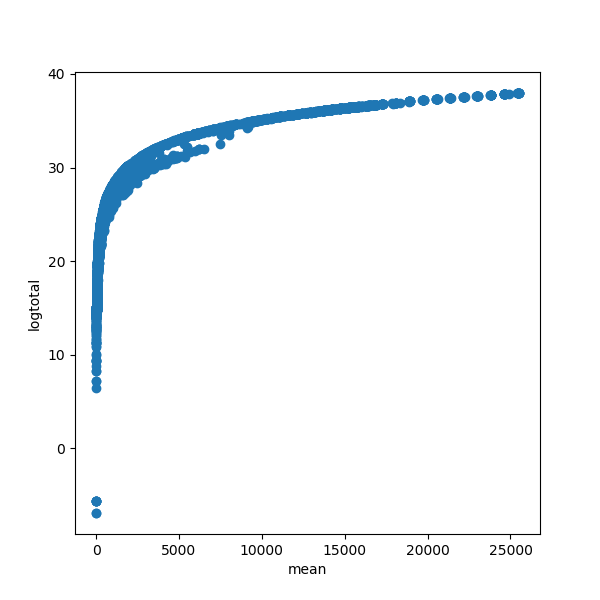

In [28]:
plt.figure(figsize=(6,6))
plt.xlabel("mean")
plt.ylabel('logtotal')
plt.scatter(data['mean'], data['logtotal'], cmap='brg')
plt.show()

<IPython.core.display.Javascript object>


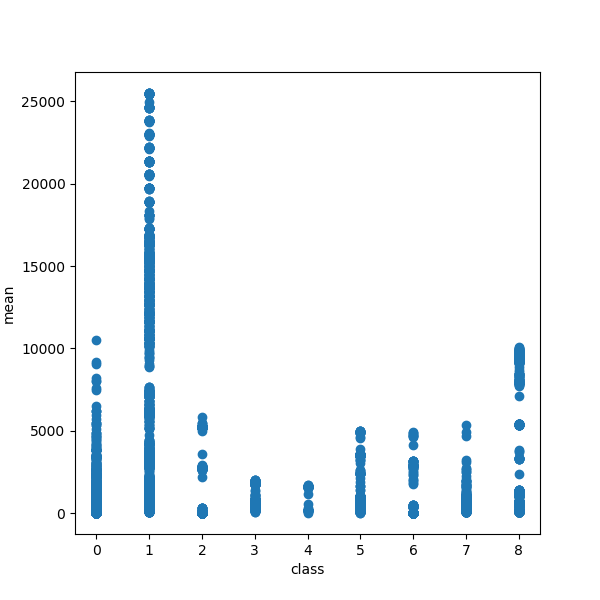

In [35]:
plt.figure(figsize=(6,6))
plt.xlabel("class")
plt.ylabel("mean")
plt.scatter(data['class'], data['mean'],  cmap='brg')
plt.show()

<IPython.core.display.Javascript object>


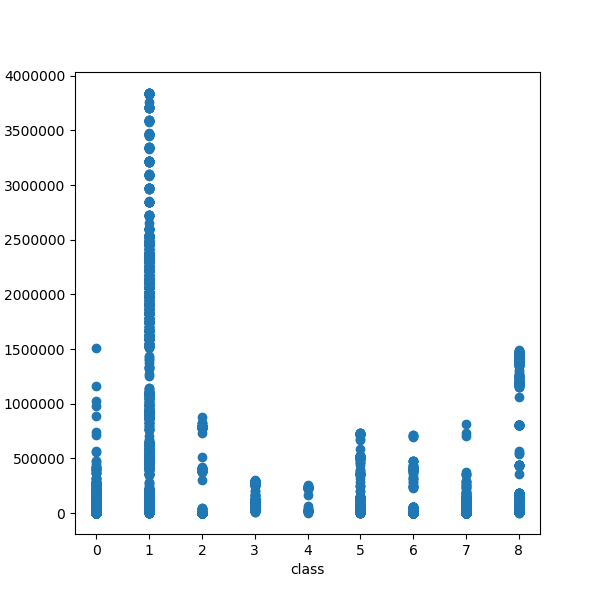

In [37]:
plt.figure(figsize=(6,6))
plt.xlabel("class")
plt.ylabel('max')
plt.scatter(data['class'], data['max'],  cmap='brg')
plt.show()

<IPython.core.display.Javascript object>


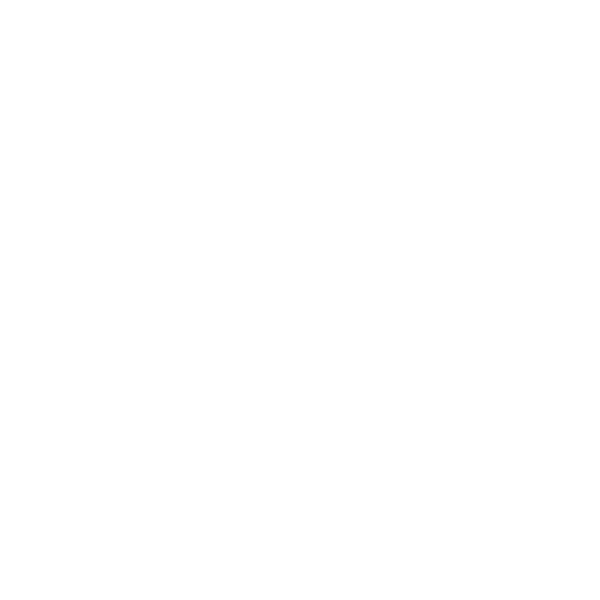

<IPython.core.display.Javascript object>


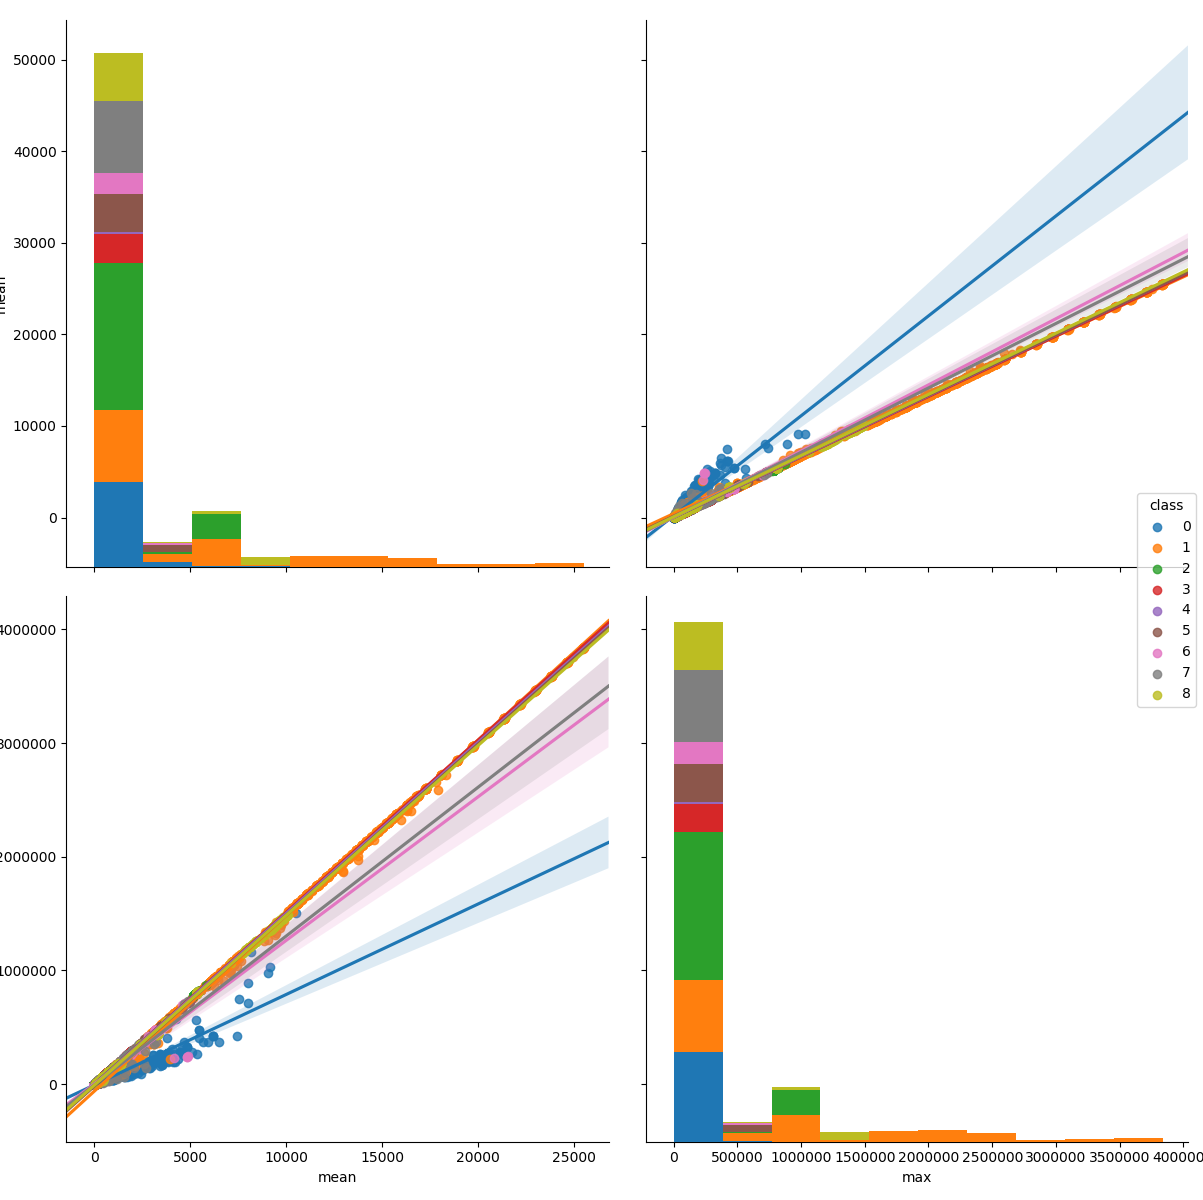

In [42]:
plt.figure(figsize=(6,6))
sns.pairplot(data, vars=['mean','max'], kind='reg', hue='class', size=6)
plt.show()

<IPython.core.display.Javascript object>


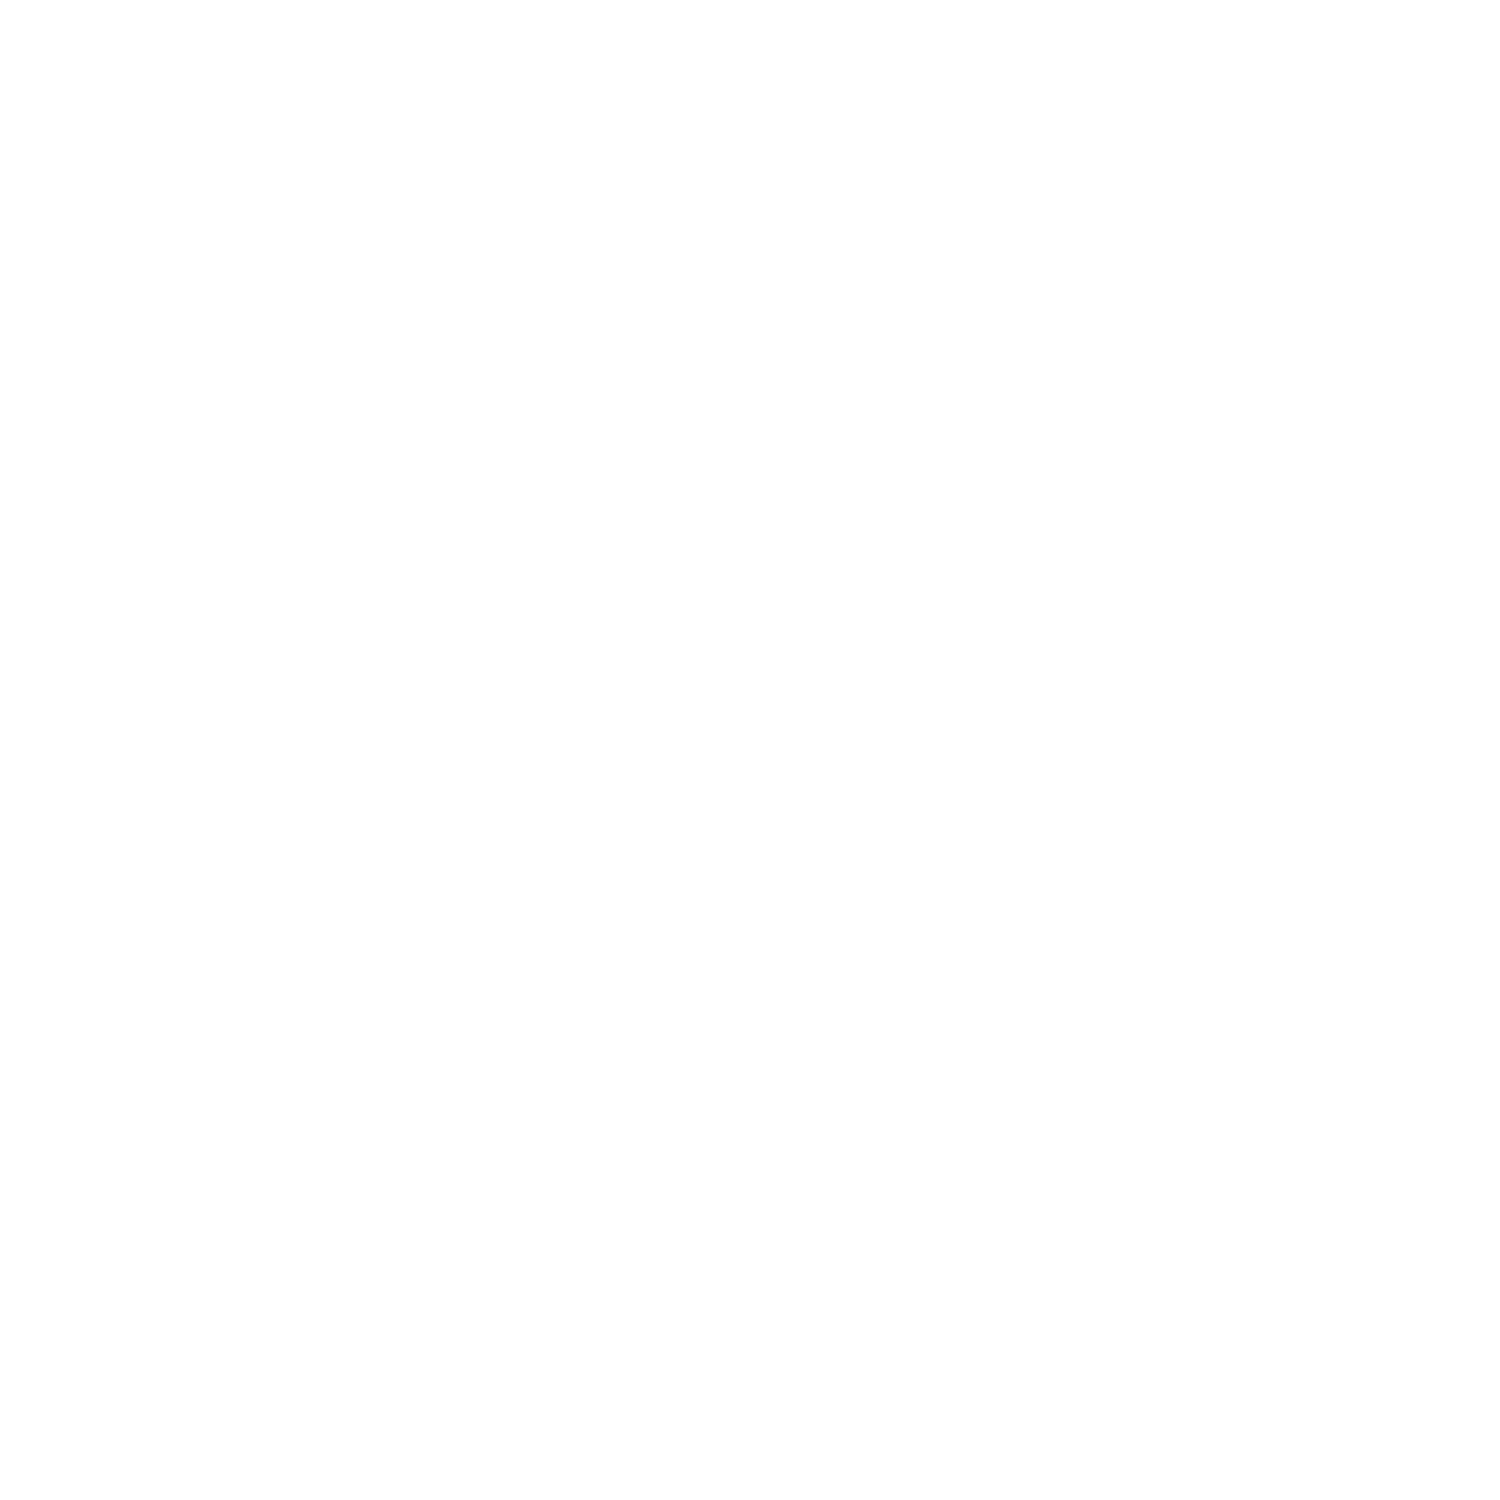

<IPython.core.display.Javascript object>


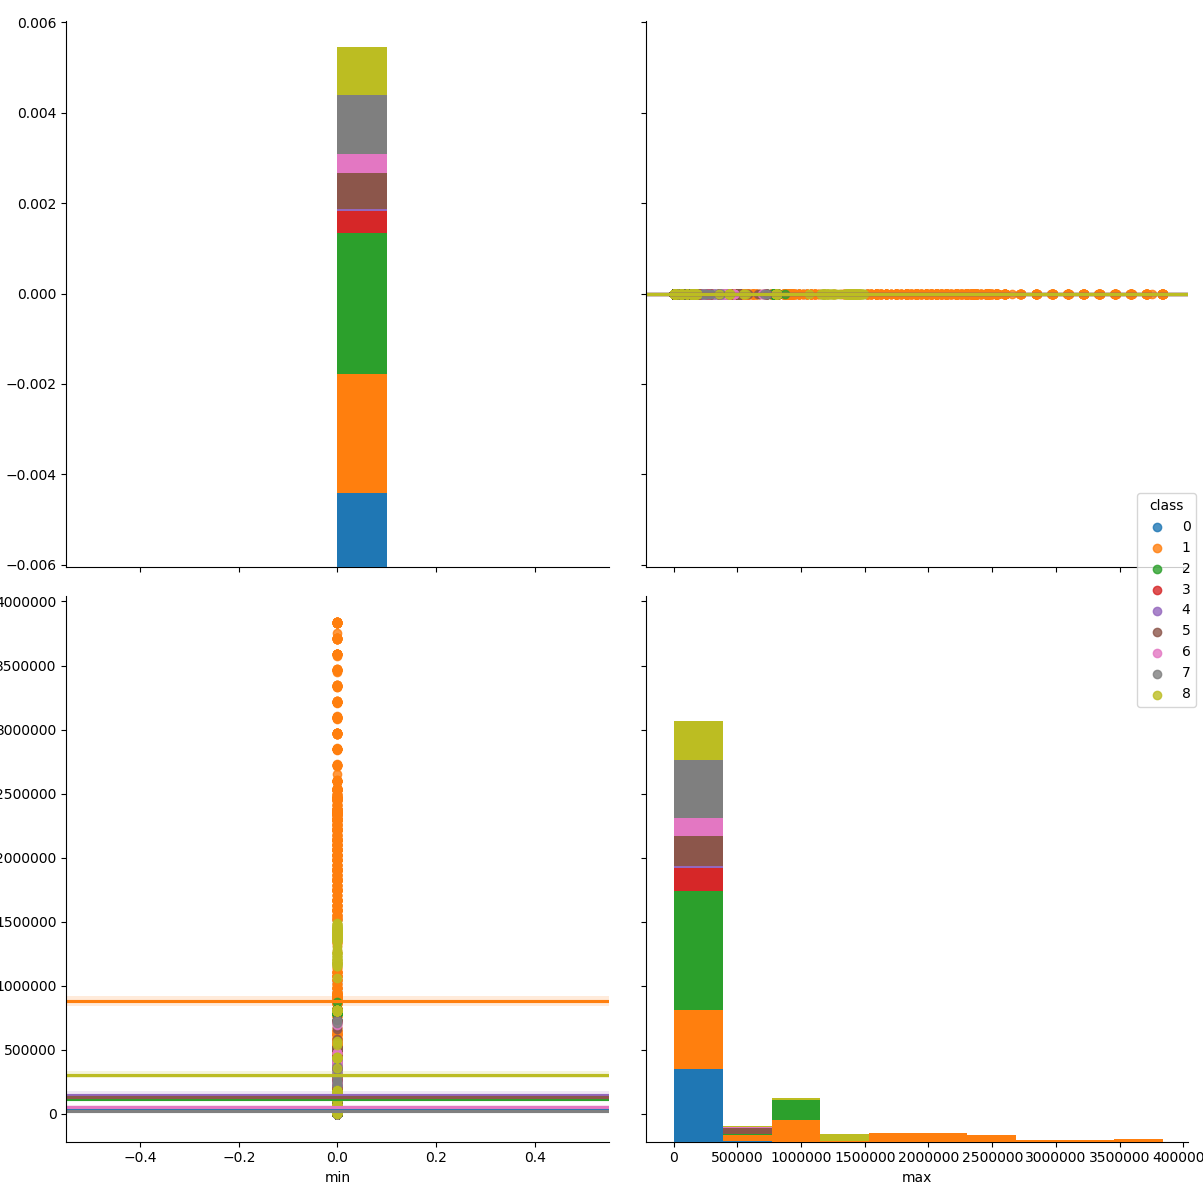

In [47]:

plt.figure(figsize=(15,15))
sns.pairplot(data, vars=['min','max'], kind='reg', hue='class', size=6)
plt.show()

In [38]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result, y,stratify=y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3>Conclusion</h3>

In [53]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["file_type", "Train Log-loss", "Test Log-loss"]
x.add_row(["K-NN on byte file",0.179,0.324])
x.add_row(["Logistic Regression on byte file",0.48,0.55])
x.add_row(["Random Forest on byte file",0.026,0.09])
x.add_row(["XGBoost on byte file",0.024,0.08])

x.add_row(["K-NN on asm file",0.04,0.08])
x.add_row(["Logistic Regression on asm file",0.39,0.415])
x.add_row(["Random Forest on asm file",0.01,0.05])
x.add_row(["XGBoost on asm file",0.01,0.04])
x.add_row(["Random Forest on final feature",0.01,0.04])
x.add_row(["XGBoost on final feature",0.01,0.03])
x.add_row(["XGBoost on feature engineering",0.009,0.0091])
print(x)

+----------------------------------+----------------+---------------+
|            file_type             | Train Log-loss | Test Log-loss |
+----------------------------------+----------------+---------------+
|        K-NN on byte file         |     0.179      |     0.324     |
| Logistic Regression on byte file |      0.48      |      0.55     |
|    Random Forest on byte file    |     0.026      |      0.09     |
|       XGBoost on byte file       |     0.024      |      0.08     |
|         K-NN on asm file         |      0.04      |      0.08     |
| Logistic Regression on asm file  |      0.39      |     0.415     |
|    Random Forest on asm file     |      0.01      |      0.05     |
|       XGBoost on asm file        |      0.01      |      0.04     |
|  Random Forest on final feature  |      0.01      |      0.04     |
|     XGBoost on final feature     |      0.01      |      0.03     |
|  XGBoost on feature engineering  |     0.009      |     0.0091    |
+-------------------

<h3> Steps to be followed </h3>

* First we separate the data into bytefiles and asmfiles separately and perform analysis and modelling separately on both of them.
* Then we take bytefiles dataset and done some feature engineering like bi-grams, n-grams and size respectively.
* Then we split the data into train and test and perform modelling such as K-NN, Logistic Regression, Random Forest, XGBOOST.
* Similar steps are done on asmfiles.
* After performing modelling separately we combine both the files and then perform modelling on the combined data which gives us the better log-loss.
* Finally, we done some advance feature engineering and reduce the log-loss<0.01.

## I have done extra eda on cell no 28,35,37,42,47